# Case de Treino Quant.dev

<p align='center'>
    <img src='https://www.icr.org/i/articles/af/monkey_biz_chimp_wide.jpg'>
</p>

Neste notebook você praticará técnicas que serão necessárias para desenvolver uma estratégia quantitativa de investimentos. São elas:

1. Obter dados financeiros
2. Visualização de dados financeiros
3. Cálculo de Risco e Retorno
4. Estatística
5. Processos estocásticos 
6. Portfólio de investimento
7. Gestão de Risco
8. Algotrading
9. Análise e previsão de Séries Temporais
10. Machine Learning
----
## Materiais de apoio:
1. [Coursera: Introduction to Portfolio Construction and Analysis with Python ](https://www.coursera.org/programs/universidade-de-sao-paulo-br-on-coursera-mvxtw?currentTab=MY_COURSES&productId=qeyXSV_uEeiNIQqyU-T6bA&productType=course&showMiniModal=true) 

    - Semanas 1 e 2 

2. [Playlist de Finanças Quantitativas do FEA.dev ](https://www.youtube.com/playlist?list=PLiJqHBsOKi2cabSus1hgdSNAHeU0md6_D)

3. [Extração de dados do Banco Central de forma simplificada ](https://medium.com/fea-dev/extra%C3%A7%C3%A3o-de-dados-do-banco-central-de-forma-simplificada-7b946069c03e)


4. Livros: 
    
    * _Python for Finance: Analyze Big Financial Data (segunda edição)_ (especialmente o capítulo 12)


5. Cursos do DataCamp: 
   
    - [Introduction to Portfolio Risk Management in Python ](https://learn.datacamp.com/courses/introduction-to-portfolio-risk-management-in-python)
    - [Quantitative Risk Management in Python ](https://learn.datacamp.com/courses/quantitative-risk-management-in-python)
    - [Machine Learning for Finance in Python ](https://learn.datacamp.com/courses/machine-learning-for-finance-in-python)
    - [Machine Learning for Time Series Data in Python](https://learn.datacamp.com/courses/machine-learning-for-time-series-data-in-python)


6. Extras (**Não são necessários**, apenas para motivá-los)
    - [What is Quant Finance ](https://www.youtube.com/watch?v=l7imVaK0MIQ)
    - [What is a Quant Trader? | Systematic Investing | What is a Quant Hedge Fund? | Trading Ideas](https://www.youtube.com/watch?v=EBZVtDZw9ug)
    - [The Story of James Simons - Renaissance Technologies & Medallion Fund ](https://www.youtube.com/watch?v=xkbdZb0UPac&pp=ugMICgJwdBABGAE%3D)
    - [Quants Os Alquimistas de Wall Street ](https://www.youtube.com/watch?v=ed2FWNWwE3I)
    - [Nossa planilha de recomendações (blogs, sites, canais do youtube) ](https://docs.google.com/spreadsheets/d/12YnAl8Tmd5fTDUL__3dEKsnQ1G28yKNaOLRt3Hq3aZs/edit#gid=0)
    - [What is Quantitative Finance? ](https://medium.com/swlh/what-is-quantitative-finance-193ee8788ed4#:~:text=It%20is%20a%20field%20of,trading%2C%20and%20predicting%20market%20moves)
    
    - Blog da Giant Steps
        - [O que são fundos quantitativos?](https://gscap.com.br/o-que-e-um-fundo-quantitativo/)
        - [Evolução do Mercado de Gestão Quantitativa no Brasil](https://gscap.com.br/evolucao-do-mercado-de-gestao-quantitativa-brasileiro/)
        - [Como combinar ativos de risco e criar um portfólio conservador](https://gscap.com.br/como-combinar-2-ativos-de-risco-e-deixar-uma-carteira-de-investimentos-mais-conservadora/)
        - [O que é um algoritmo de investimento?](https://gscap.com.br/o-que-e-um-algoritmo-de-investimento/)
        - [Tipos de algoritmos – Parte I: Algoritmos de Estratégia](https://gscap.com.br/tipos-de-algoritmos-parte-1-algoritmos-de-estrategia/)
        - [Tipos de Algoritmo – Parte II : A Orquestra](https://gscap.com.br/tipos-de-algoritmo-parte-ii-a-orquestra/)




In [6]:
!pip install pandas_datareader

----

## 0-) Bibliotecas Básicas

In [7]:
import pandas as pd
!pip install cufflinks
import numpy as np
from pandas_datareader import data as web # Evita a escrita do data e troca pelo web
import matplotlib.pyplot as plt
!pip install mplfinance


## 1-) Obter dados financeiros

Para acessar dados históricos de ativos, podemos utilizar diferentes APIs¹ com suporte ao python. Geralmente, elas nos retornam datasets no formato OHLCV (open-high-low-close-volume). Se atente para a exstência de colunas como 'split' ou 'adjustment close', pois será por meio dessas informações que realizamos backtest, já que uma ação pode ter historicamente distribuído dividendos ou sofrido inplits/splits.

São alguns meios que você pode utilizar ²:
- Yahoo Finance
- Alpha vantge
- Investpy (do site investing.com)
- Quandl
- Pandas Data Reader: é uma biblioteca que permite a criação de Dataframes utilizando diferentes fontes de dados da internet, saiba que ela possui integração com algumas APIs de dados financeiros.

Pesquise sobre o funcionamento delas , como instalar (se atente aos requerimentos, caso haja conflito com seu ambiente padrão, crie um outro documento para extrair os dados), e se essas fontes estão ativas no momento ³

Observações:

1: API significa Application Programming Interface (Interface de Programação de Aplicação), são canais de trocas de informações entre sistemas. Nesse caso, são fornecidos dados financeiros de um sistema (servidor) para o seu computador

2: Ações listadas na B3 geralmente são identificadas por essas APIs pelo sufixo ".SAO" ou ".SA". Exemplo "PETR4.SAO"

3: Essa parte pode dar muita dor de cabeça, principalmente na forma como você organiza e agrupa os dados



<img src="https://i.makeagif.com/media/3-24-2016/JrSj8G.gif"></img>

### a-) Obtenha os dados diários das ações da Vale (VALE3) entre "01/01/2018" e "31/08/2021"


C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '31-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


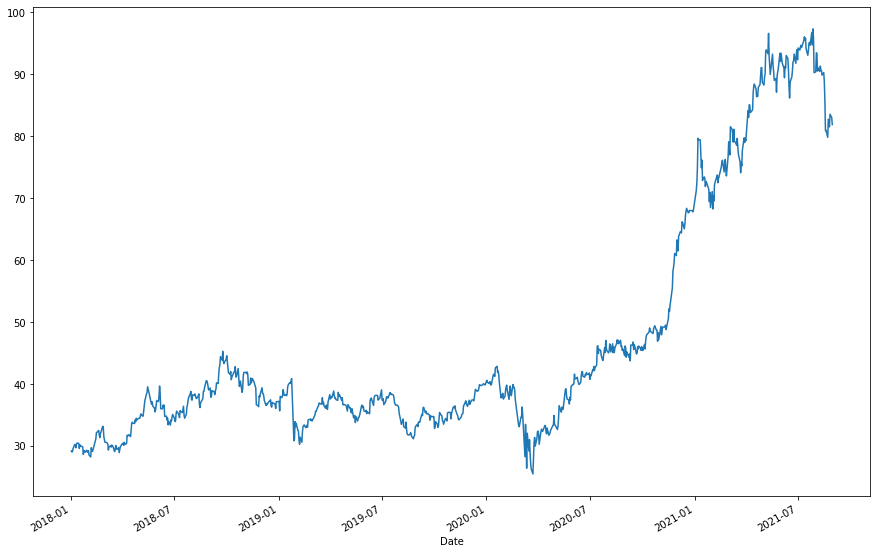

In [8]:
df = web.DataReader(f'VALE3.SA', data_source='yahoo', start=f'01-01-2018', end='31-08-2021')
#display(df)
df["Adj Close"].plot(figsize=(15, 10))
plt.show()

### b-) Obtenha dados diários de um conjunto de 10 ações (Vale, Petrobras, Klabin, Magazine Luiza, Minerva, Itaú, Bradesco, B3, Via Varejo, Ambev) entre "01/01/2018" e "31/08/2021", agrupe-as da forma que preferir

obs: pode ser que ocorra um erro devido a quantidade de "chamadas que você faz", tente resolver

In [9]:
lista=['VALE3.SA','PETR4.SA','KLBN11.SA','MGLU3.SA','NERV','ITUB','BBD','B3SA3.SA','ABEV']
for i in lista:
    df = web.DataReader(i, data_source='yahoo', start=f'01-01-2018', end='31-08-2021')
    print(f'Tabela da ação:{i}')
    display(df)

    
    

C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '31-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


Tabela da ação:VALE3.SA


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,41.740002,40.439999,40.439999,41.720001,14156500.0,29.179222
2018-01-03,41.880001,41.299999,41.830002,41.470001,12744200.0,29.004368
2018-01-04,42.369999,41.520000,41.810001,41.639999,18433000.0,29.123270
2018-01-05,42.290001,41.310001,41.570000,42.290001,15251300.0,29.577883
2018-01-08,43.230000,42.400002,42.400002,43.230000,14542800.0,30.235329
...,...,...,...,...,...,...
2021-08-25,100.459999,98.550003,100.089996,99.500000,15088600.0,82.522583
2021-08-26,99.800003,98.230003,99.489998,98.230003,18032300.0,81.469284
2021-08-27,101.000000,98.900002,99.010002,100.690002,19572800.0,83.509537


C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '31-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


Tabela da ação:PETR4.SA


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,8.335219
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,8.410768
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,8.425874
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,8.476239
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,8.576966
...,...,...,...,...,...,...
2021-08-25,27.830000,27.379999,27.629999,27.730000,46031200.0,16.487759
2021-08-26,27.879999,27.469999,27.580000,27.490000,41061300.0,16.345062
2021-08-27,28.490000,27.670000,27.700001,28.490000,76465300.0,16.939642


C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '31-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


Tabela da ação:KLBN11.SA


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,18.299999,17.559999,17.559999,18.200001,1608700.0,14.821436
2018-01-03,18.480000,17.750000,18.299999,17.969999,1510900.0,14.634132
2018-01-04,18.240000,17.830000,18.090000,18.000000,1508300.0,14.658562
2018-01-05,18.040001,17.809999,18.000000,17.830000,1442600.0,14.520120
2018-01-08,18.180000,17.809999,17.920000,18.150000,2043400.0,14.780721
...,...,...,...,...,...,...
2021-08-25,26.830000,25.400000,25.549999,26.670000,10323300.0,24.216576
2021-08-26,26.799999,26.360001,26.510000,26.370001,4701300.0,23.944174
2021-08-27,26.790001,26.270000,26.469999,26.719999,6299600.0,24.261974


C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '31-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


Tabela da ação:MGLU3.SA


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,2.574375,2.450312,2.528125,2.478125,59427200.0,2.390916
2018-01-03,2.542500,2.422500,2.468750,2.446875,41385600.0,2.360766
2018-01-04,2.516250,2.478125,2.500000,2.505625,47936000.0,2.417448
2018-01-05,2.528437,2.448437,2.514062,2.456250,30684800.0,2.369810
2018-01-08,2.503437,2.448437,2.453125,2.456562,28796800.0,2.370111
...,...,...,...,...,...,...
2021-08-25,19.559999,19.030001,19.120001,19.549999,30751500.0,19.549999
2021-08-26,19.700001,18.690001,19.469999,18.799999,34921000.0,18.799999
2021-08-27,19.150000,18.760000,18.920000,19.030001,22854400.0,19.030001


C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '31-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


Tabela da ação:NERV


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,50.400002,48.400002,48.799999,49.599998,16625,49.599998
2018-01-03,50.400002,48.799999,50.000000,49.200001,23250,49.200001
2018-01-04,50.000000,47.599998,49.599998,48.400002,28650,48.400002
2018-01-05,49.599998,47.200001,48.400002,48.000000,14500,48.000000
2018-01-08,48.000000,44.000000,48.000000,44.400002,37525,44.400002
...,...,...,...,...,...,...
2021-08-25,15.976000,14.720000,15.600000,15.280000,110588,15.280000
2021-08-26,15.440000,14.640000,15.280000,14.800000,62888,14.800000
2021-08-27,15.600000,14.800000,14.800000,15.120000,49438,15.120000


C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '31-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


Tabela da ação:ITUB


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,7.436109,7.293212,7.315196,7.436109,10995966.0,5.838880
2018-01-03,7.546029,7.403133,7.425117,7.535037,32555950.0,5.916561
2018-01-04,7.710910,7.606485,7.633965,7.628469,36216784.0,5.989921
2018-01-05,7.732894,7.573509,7.600989,7.721902,13268522.0,6.063286
2018-01-08,7.716406,7.611981,7.672437,7.617477,19901509.0,5.981290
...,...,...,...,...,...,...
2021-08-25,4.880462,4.748557,4.789777,4.880462,24690858.0,4.717070
2021-08-26,4.830998,4.707337,4.798021,4.723825,34572683.0,4.565677
2021-08-27,4.872218,4.699093,4.723825,4.863974,30774417.0,4.701133


C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '31-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


Tabela da ação:BBD


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,8.858333,8.733333,8.750000,8.850000,9300240.0,7.340299
2018-01-03,8.975000,8.808333,8.816667,8.966667,9140760.0,7.441269
2018-01-04,9.141667,9.016667,9.041667,9.033333,7346400.0,7.496594
2018-01-05,9.158333,8.933333,8.983333,9.141667,6568800.0,7.586494
2018-01-08,9.158333,9.033333,9.100000,9.075000,9023400.0,7.531168
...,...,...,...,...,...,...
2021-08-25,4.510000,4.390000,4.420000,4.500000,16796700.0,4.334208
2021-08-26,4.470000,4.370000,4.450000,4.370000,15260100.0,4.208997
2021-08-27,4.500000,4.360000,4.380000,4.500000,17306900.0,4.334208


C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '31-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


Tabela da ação:B3SA3.SA


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,7.780000,7.603333,7.630000,7.636666,29013300.0,6.373042
2018-01-03,7.806666,7.560000,7.583333,7.766666,18920100.0,6.481531
2018-01-04,7.866666,7.756666,7.790000,7.816666,16965300.0,6.523258
2018-01-05,7.930000,7.776666,7.800000,7.930000,21964800.0,6.617838
2018-01-08,8.060000,7.830000,7.916666,7.966666,20775600.0,6.648438
...,...,...,...,...,...,...
2021-08-25,13.990000,13.700000,13.850000,13.990000,20126000.0,13.143552
2021-08-26,13.950000,13.620000,13.950000,13.660000,28614800.0,12.833517
2021-08-27,13.940000,13.700000,13.750000,13.940000,23793100.0,13.096578


C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '31-08-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


Tabela da ação:ABEV


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,6.63,6.53,6.54,6.61,16191800.0,5.813643
2018-01-03,6.74,6.62,6.67,6.65,13987800.0,5.848824
2018-01-04,6.72,6.59,6.68,6.64,10704000.0,5.840028
2018-01-05,6.69,6.59,6.63,6.67,14237800.0,5.866414
2018-01-08,6.66,6.59,6.63,6.62,10900000.0,5.822437
...,...,...,...,...,...,...
2021-08-25,3.32,3.25,3.27,3.32,16271200.0,3.192399
2021-08-26,3.28,3.21,3.28,3.21,22672400.0,3.086627
2021-08-27,3.24,3.19,3.23,3.23,28839300.0,3.105858


In [10]:
from pandas_datareader import data as pdr
lista = ['VALE3.SA','PETR4.SA','KLBN11.SA','MGLU3.SA','NERV','ITUB','BBD','B3SA3.SA','ABEV']
df= pd.DataFrame()
for i in lista:
    df[i] = pdr.DataReader(i,data_source='yahoo',start='1995-1-1')['Adj Close']

In [11]:
df.tail()

,VALE3.SA,PETR4.SA,KLBN11.SA,MGLU3.SA,NERV,ITUB,BBD,B3SA3.SA,ABEV
Date,,,,,,,,,
2022-10-28,67.449997,32.570000,21.172894,4.38,2.76,5.517155,3.586129,14.18,2.93
2022-10-31,67.129997,29.809999,20.911739,4.47,2.65,5.817000,3.785914,15.04,3.04
2022-11-01,69.169998,29.860001,21.184643,4.56,2.76,5.930000,3.865827,15.12,3.06
2022-11-03,67.150002,29.950001,21.900000,4.87,2.75,5.890000,3.820000,15.38,3.08
2022-11-04,72.250000,28.299999,22.080000,4.83,2.55,5.970000,3.840000,15.60,3.24


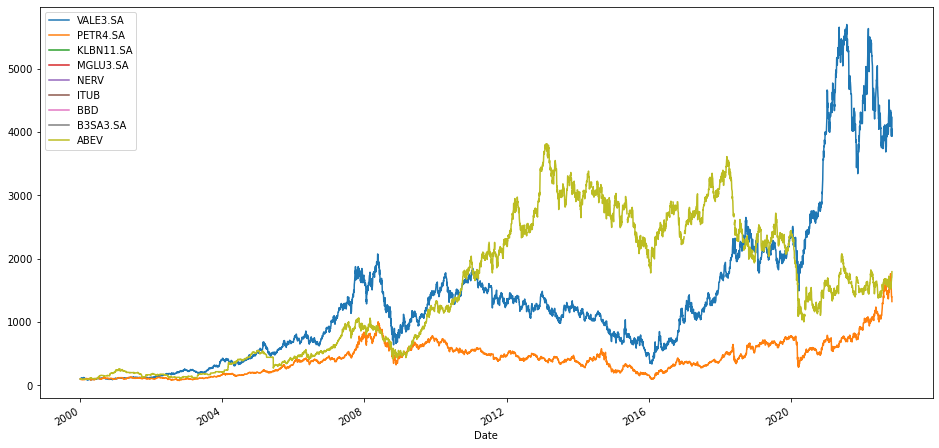

In [12]:

(df/df.iloc[0]*100).plot(figsize=(16,8));

----

## 2-) Visualização de dados financeiros

<img src='https://i.kym-cdn.com/photos/images/original/002/073/269/599'>


### a-) Faça um gráfico contendo o preço de fechamento das ações da Vale, sua média móvel dos últimos 20 dias, plote as bandas de Bollinger (dois desvios para cima e dois desvios para baixo)

obs: caso não saiba sobre as "Bandas de Bollinger" , acesse o link https://www.investopedia.com/terms/b/bollingerbands.asp 

C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:33: UserWarning: Parsing '15-10-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start = to_datetime(start)
C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '28-10-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-17,71.239998,69.260002,70.209999,70.930000,25840500,70.930000
2022-10-18,72.830002,70.739998,72.300003,71.959999,27494000,71.959999
2022-10-19,72.129997,70.580002,71.629997,71.110001,22651000,71.110001
2022-10-20,73.190002,70.320000,70.980003,72.019997,37240700,72.019997
2022-10-21,74.680000,71.440002,71.800003,74.129997,36846800,74.129997
2022-10-24,73.949997,71.180000,73.269997,71.930000,32035800,71.930000
2022-10-25,73.269997,70.919998,71.610001,71.930000,28158100,71.930000
2022-10-26,74.849998,71.120003,71.279999,73.529999,40845700,73.529999
2022-10-27,72.120003,69.430000,72.000000,70.910004,52613000,70.910004


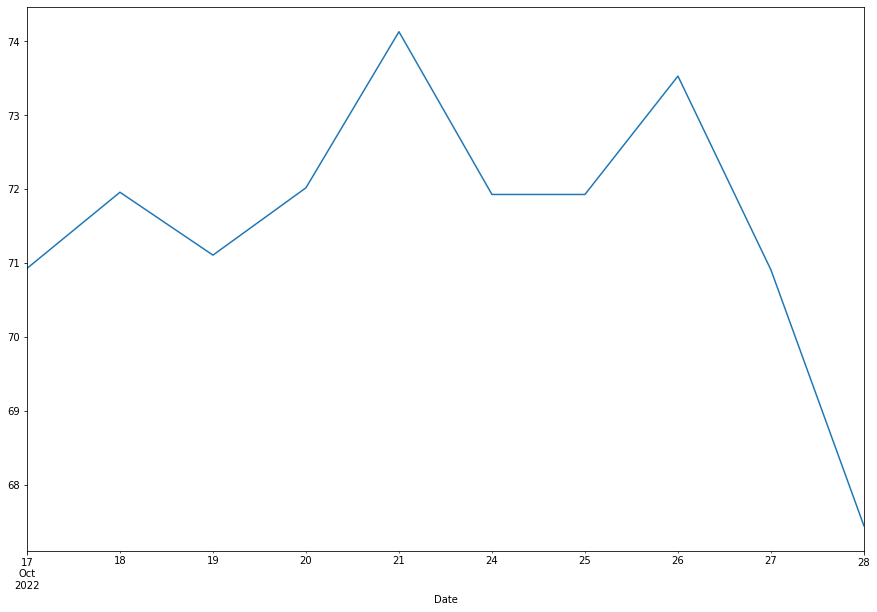

In [13]:
df = web.DataReader(f'VALE3.SA', data_source='yahoo', start=f'15-10-2022', end='28-10-2022')
display(df)
df["Adj Close"].plot(figsize=(15, 10))
plt.show()

### b-) Faça um gráfico contendo o preço de fechamento (ajustado) três ativos extraídos por você anteriormente

obs: é possível plotá-los em um mesmo eixo ou criar subplots

<AxesSubplot:xlabel='Date'>

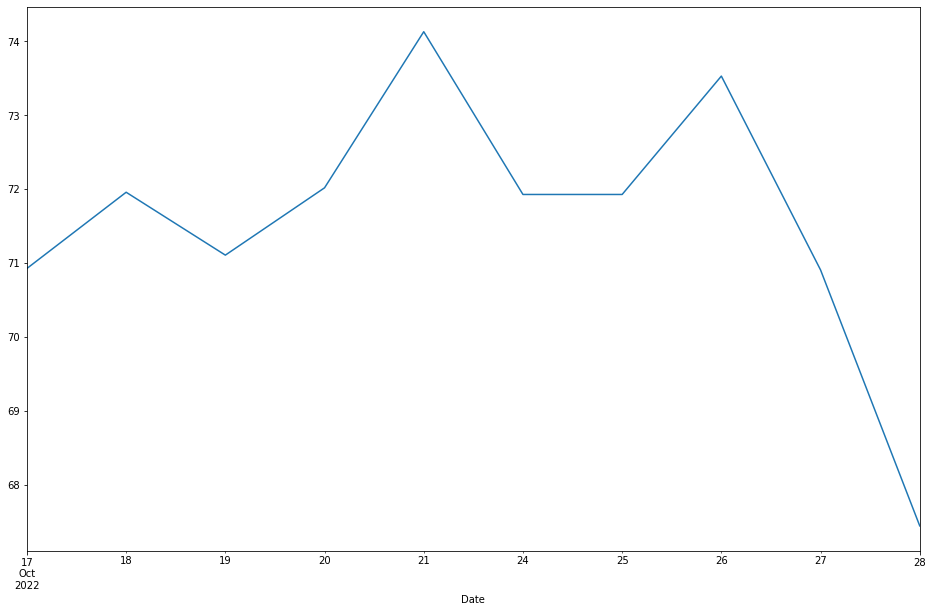

In [14]:
df['Close'].plot(figsize = (16, 10))

In [15]:
# Calcular Média Móvel Simples
df['MMS20'] = df['Close'].rolling(window = 20).mean()

# Calculando o Desvio Padrão (necessário para criar a banda superior e inferior)
df['Desvio_Padrao'] = df['Close'].rolling(window = 20).std()

# Calculando a Banda Superior
df['Banda_Superior'] = df['MMS20'] + (df['Desvio_Padrao'] * 2)

# Calculando a Banda Inferior
df['Banda_Inferior'] = df['MMS20'] - (df['Desvio_Padrao'] * 2)
df.head()

,High,Low,Open,Close,Volume,Adj Close,MMS20,Desvio_Padrao,Banda_Superior,Banda_Inferior
Date,,,,,,,,,,
2022-10-17,71.239998,69.260002,70.209999,70.930000,25840500,70.930000,NaN,NaN,NaN,NaN
2022-10-18,72.830002,70.739998,72.300003,71.959999,27494000,71.959999,NaN,NaN,NaN,NaN
2022-10-19,72.129997,70.580002,71.629997,71.110001,22651000,71.110001,NaN,NaN,NaN,NaN
2022-10-20,73.190002,70.320000,70.980003,72.019997,37240700,72.019997,NaN,NaN,NaN,NaN
2022-10-21,74.680000,71.440002,71.800003,74.129997,36846800,74.129997,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Bandas de Bollinger')

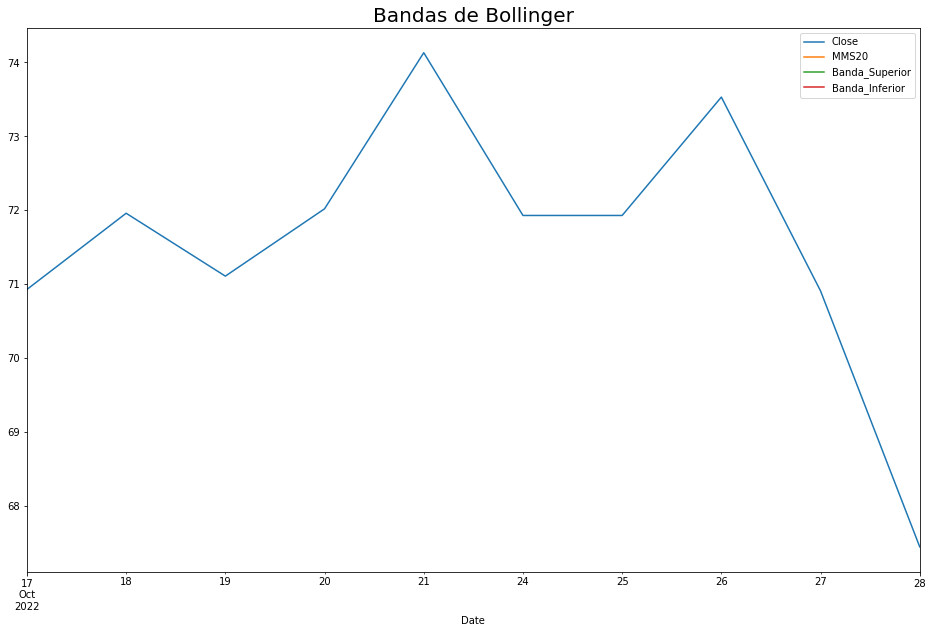

In [16]:
df[['Close', 'MMS20', 'Banda_Superior', 'Banda_Inferior']].plot(figsize = (16, 10))
plt.title('Bandas de Bollinger', fontsize = 20)

In [17]:
# Criando as colunas de Sinal de Compra e Venda
df['Sinal_de_Compra'] = np.where(df['Banda_Inferior'] > df['Close'], df['Close'], np.nan)
df['Sinal_de_Venda'] = np.where(df['Banda_Superior'] < df['Close'], df['Close'], np.nan)

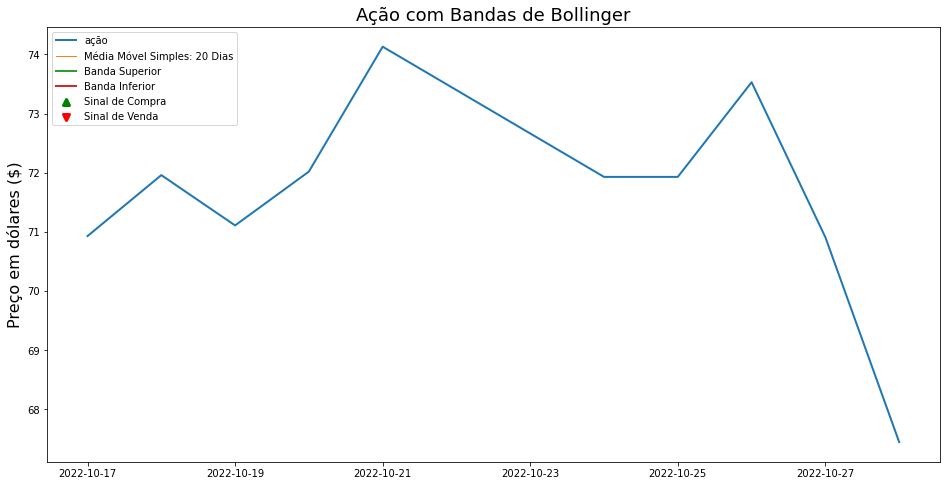

In [18]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.index, df['Close'], linewidth = 2, label = 'ação')
ax.plot(df.index, df['MMS20'], linewidth = 1, label = 'Média Móvel Simples: 20 Dias')
ax.plot(df.index, df['Banda_Superior'], linewidth = 2, label = 'Banda Superior')
ax.plot(df.index, df['Banda_Inferior'], linewidth = 2, label = 'Banda Inferior')

ax.scatter(df.index, df['Sinal_de_Compra'], color = 'green', marker = '^', linewidth = 3, label = 'Sinal de Compra')
ax.scatter(df.index, df['Sinal_de_Venda'], color = 'red', marker = 'v', linewidth = 3, label = 'Sinal de Venda')

ax.set_title("Ação com Bandas de Bollinger", fontsize = 18)
ax.set_ylabel("Preço em dólares ($)", fontsize = 16)

plt.legend()
plt.show()

### c-) Faça um gráfico contendo o preço de fechamento das ações da Vale e seu volume (repare que o nível de grandeza entre as unidades é diferente, procure um jeito que não altere as proporções do gráfico)

<AxesSubplot:xlabel='Date'>

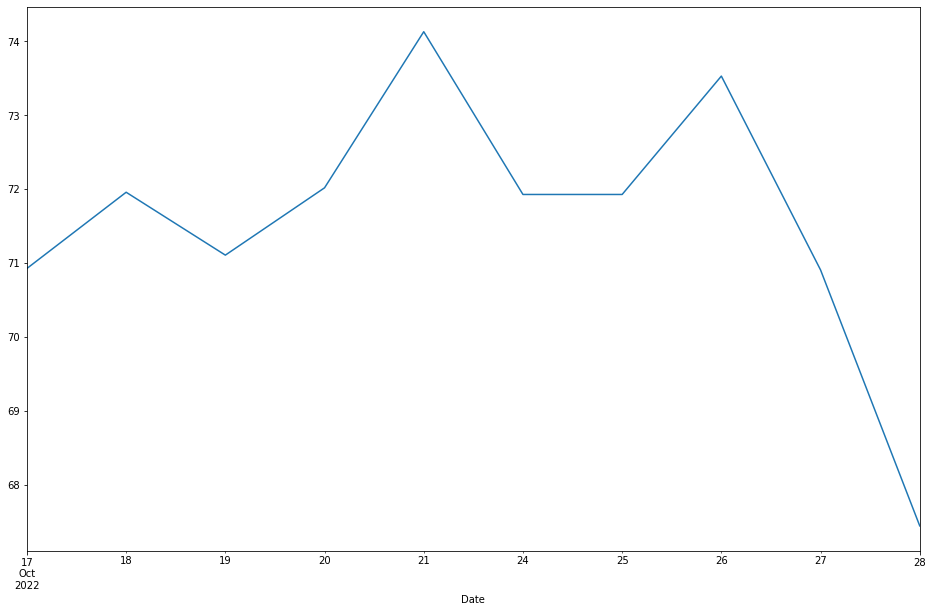

In [19]:
df['Close'].plot(figsize = (16, 10))

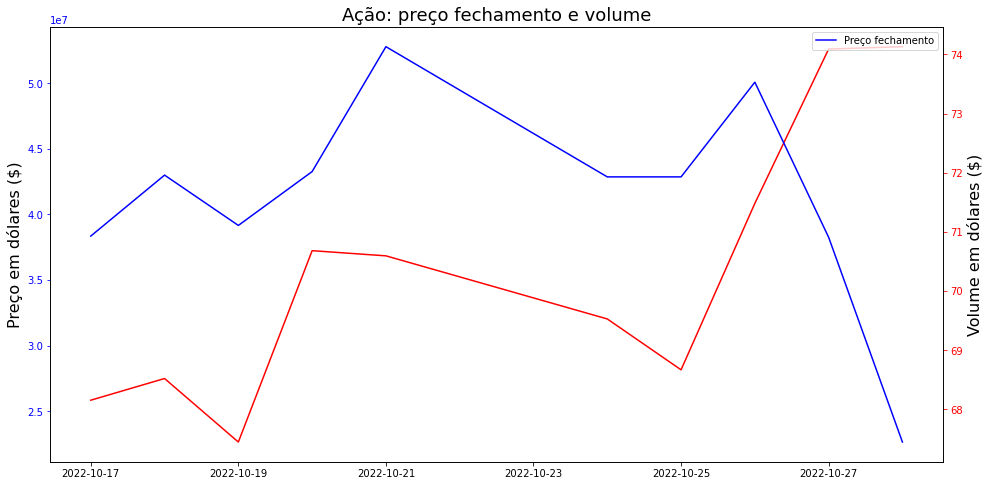

In [20]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.index, df['Volume'], label = 'Volume',color='red')
ax2=ax.twinx()
ax2.plot(df.index,df['Close'], label = 'Preço fechamento',color='blue')
ax.tick_params('y',colors='blue')
ax2.tick_params('y',colors='red')
ax.set_title("Ação: preço fechamento e volume", fontsize = 18)
ax.set_ylabel("Preço em dólares ($)", fontsize = 16)
ax2.set_ylabel("Volume em dólares ($)", fontsize = 16)
plt.legend()
plt.show()

### d-) Faça um gráfico candle stick das ações da Vale

C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:33: UserWarning: Parsing '25-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start = to_datetime(start)
C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '28-10-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


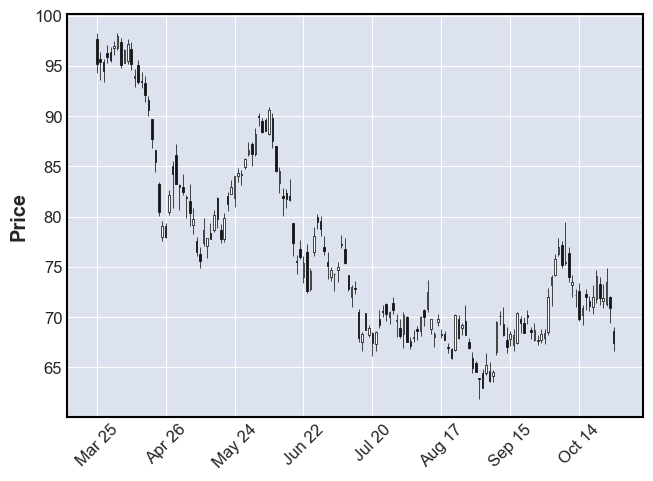

<Figure size 100x100 with 0 Axes>

In [21]:
import mplfinance as mpf
df = web.DataReader(f'VALE3.SA', data_source='yahoo', start=f'25-03-2022', end='28-10-2022')
mpf.plot(df,type='candle')
plt.figure(figsize=(1,1))
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xasis'

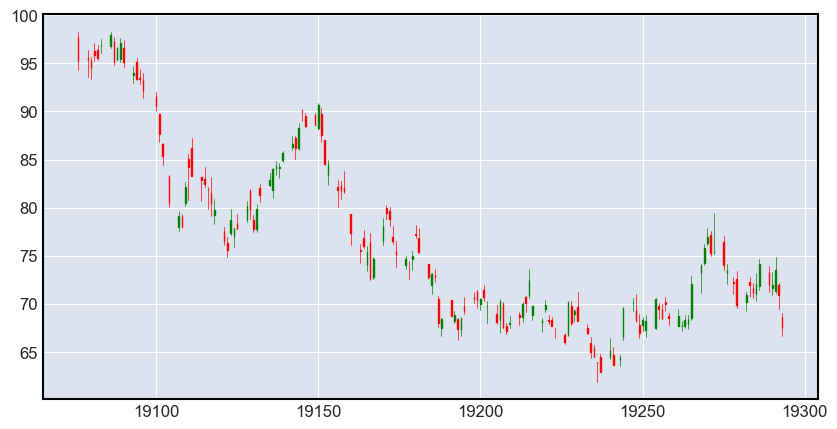

In [22]:
#tentativa de outra forma
import mplfinance.original_flavor as mpf
#from mplfinance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
df['Date']=df.index.map(mdates.date2num)
ohlc=df[['Date','Open','High','Low','Close']]

f1,ax=plt.subplots(figsize=(10,5))

candlestick_ohlc(ax,ohlc.values,colorup='green',colordown='red')
ax.xasis.set_major_formatter(mdates.DataFormatter('%y-%m'))
ax.grid(False)
ax.legend()

plt.show(block=True)

### e-) Faça um gráfico de dispersão entre dois ativos

C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:33: UserWarning: Parsing '25-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start = to_datetime(start)
C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '28-10-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)
C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:33: UserWarning: Parsing '25-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  start = to_datetime(start)
C:\Anaconda\lib\site-packages\pandas_datareader\_utils.py:37: UserWarning: Parsing '28-10-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end = to_datetime(end)


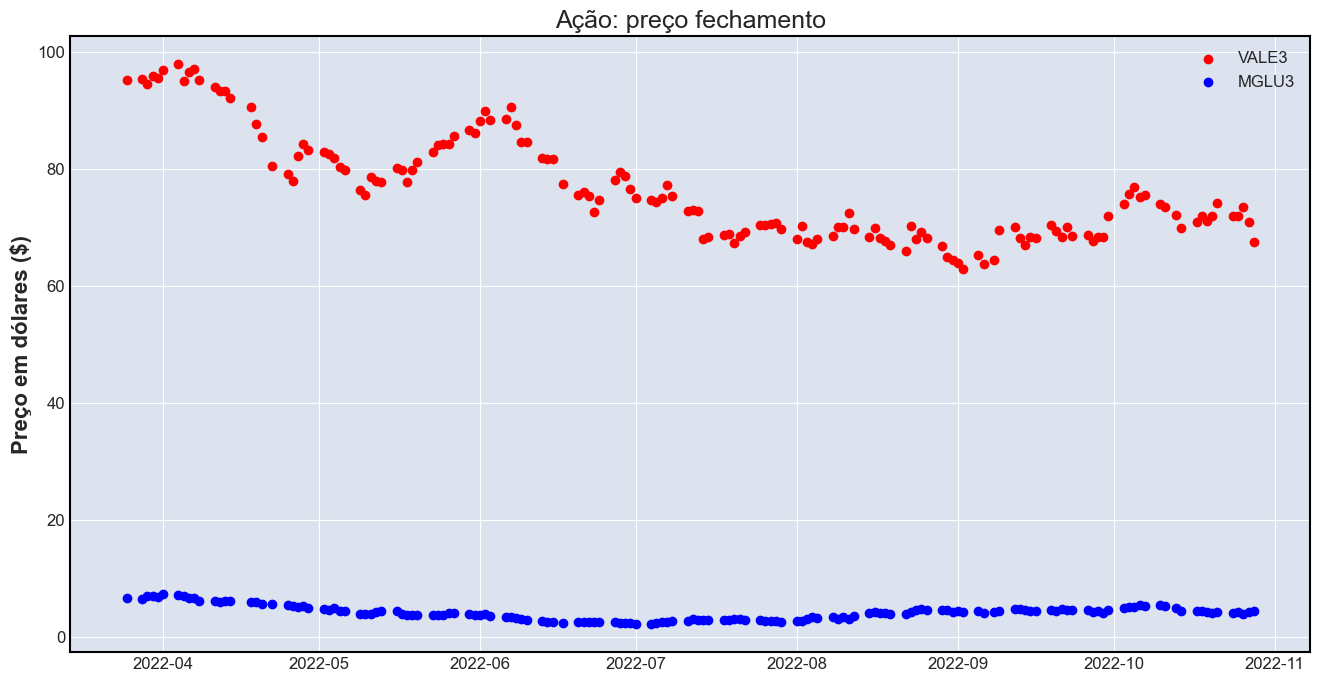

In [23]:
dfa = web.DataReader(f'VALE3.SA', data_source='yahoo', start=f'25-03-2022', end='28-10-2022')
dfb = web.DataReader(f'MGLU3.SA', data_source='yahoo', start=f'25-03-2022', end='28-10-2022')
#fig,ax=plt.subplots(figsize=(6,4))
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(dfa.index,dfa['Close'],color='red',label = 'VALE3')
ax.scatter(dfb.index,dfb['Close'],color='blue',label = 'MGLU3')
ax.set_title("Ação: preço fechamento", fontsize = 18)
ax.set_ylabel("Preço em dólares ($)", fontsize = 16)
plt.legend()


plt.show()



----


## 3-) Cálculo de Métricas de risco e retorno
<img src='https://thumbs.gfycat.com/HiddenHopefulDuckbillplatypus-size_restricted.gif'>



## __Retornos Discretos__

Há diferentes maneiras que o retorno pode ser representado.

__a-) Retornos Brutos (_Gross Returns_)__

$R_{t+1}= \frac{P_{t+1}}{P_t}$

* ${P_t}$ : preço do ativo no início do período
* $P_{t+1}$ : preço do ativo no início do período
* $t$: período inicial

obs1: a notação do período pode mudar, em alguns materiais a fórmula o representa por  $\frac{P_{t}}{P_t-1}$ . O princípio é o mesmo, posterior no numerador e anterior no denominador

obs2:  Caso seja um ativo que pague dividendo, a fórmula será a seguinte:

$R_{t+1}= \frac{P_{t+1} + D_{t+1}}{P_t}$

obs3:  Essa fórmula assume que o preço do ativo pode ser medido, o que nem sempre é verdade, dado o caso de ativos ilíquidos (isso não será importante para o case e talvez não muito importante para o andar de seus estudos, apenas saiba disso) 

O Retorno Acumulado pode ser calculado pelo produto de uma série de retornos brutos, por exemplo:

$Rcum_{t+3} = R_{t+1} + R_{t+2} R_{t+3}$




__b-) Retornos Aritméticos (_Arithmetic Returns_) ou retornos simples (_“simple returns_) ou retornos líquidos__

$r_{t+1}= R_{t+1} - 1$

* $r_{t+1}$ : retorno aritmético
* $ R_{t+1}$: retorno bruto

Nesse caso, o retorno acumulativo é calculado, por exemplo: 

$Rcum_{t+3} = (1-r_{t+1})*(1-r_{t+2})*(1-r_{t+3})$

Não há a propriedade aditiva entre os retornos  
$(1-r_{t+1})(1-r_{t+2})(1-r_{t+3})$ ≠ $1 + (r_{t+1}) (r_{t+2}) (r_{t+3})$

No entanto há propriedade aditiva entre ativos quando calculamos o retorno de um portfólio (veremos mais para frente). Como exemplo, em um portfólio com ativos igualmente balanceados __A__ e __B__, seu retorno será dado por

$r^{p}_{t+1} = 0.5r^{A}_{t+1} + 0.5r^{B}_{t+1} $

### __Retornos logarítmicos__

$rlog_{t+1} =ln(\frac{P_{t+1}}{P_t})= ln(P_{t+1}) - ln(P_{t})  =ln(R_{t+1}) = ln(1+ r_{t+1})$

* $rlog$: retorno logarítmico 

Para transformar em retorno bruto, basta fazer a seguinte conta:

$R_{t+1}= exp({rlog}_{t+1})$

Para transformar em retorno aritmético, basta :

$r_{t+1}= 1 - exp({rlog}_{t+1})$

O retorno logarítmico acumulado é dado por:

$Rlncum_{t+3} = exp({rlog}_{t+1} + {rlog}_{t+2}+ {rlog}_{t+3}) = exp(rlog_{t+1})+ exp(rlog_{t+2})+ exp(rlog_{t+3})$

obs4: Retornos logarítmicos não se agregam entre ativos

$r^{p}_{t+1} = ln(0.5exp({rlog}^{A}_{t+1}) + 0.5exp({rlog}^{B}_{t+1})) $




 ### b-) Calcule o retorno  diário ao longo de todo o período, pelo formato discreto (simples) e logarítmico das ações da Vale

In [24]:
!pip install yfinance --upgrade --no-cache-dir


In [25]:
import yfinance as yf
yf.pdr_override()

from pylab import rcParams


In [26]:
rcParams['figure.figsize']=20,10

In [27]:
precos=web.get_data_yahoo('VALE3.SA',period='2y')['Close']

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

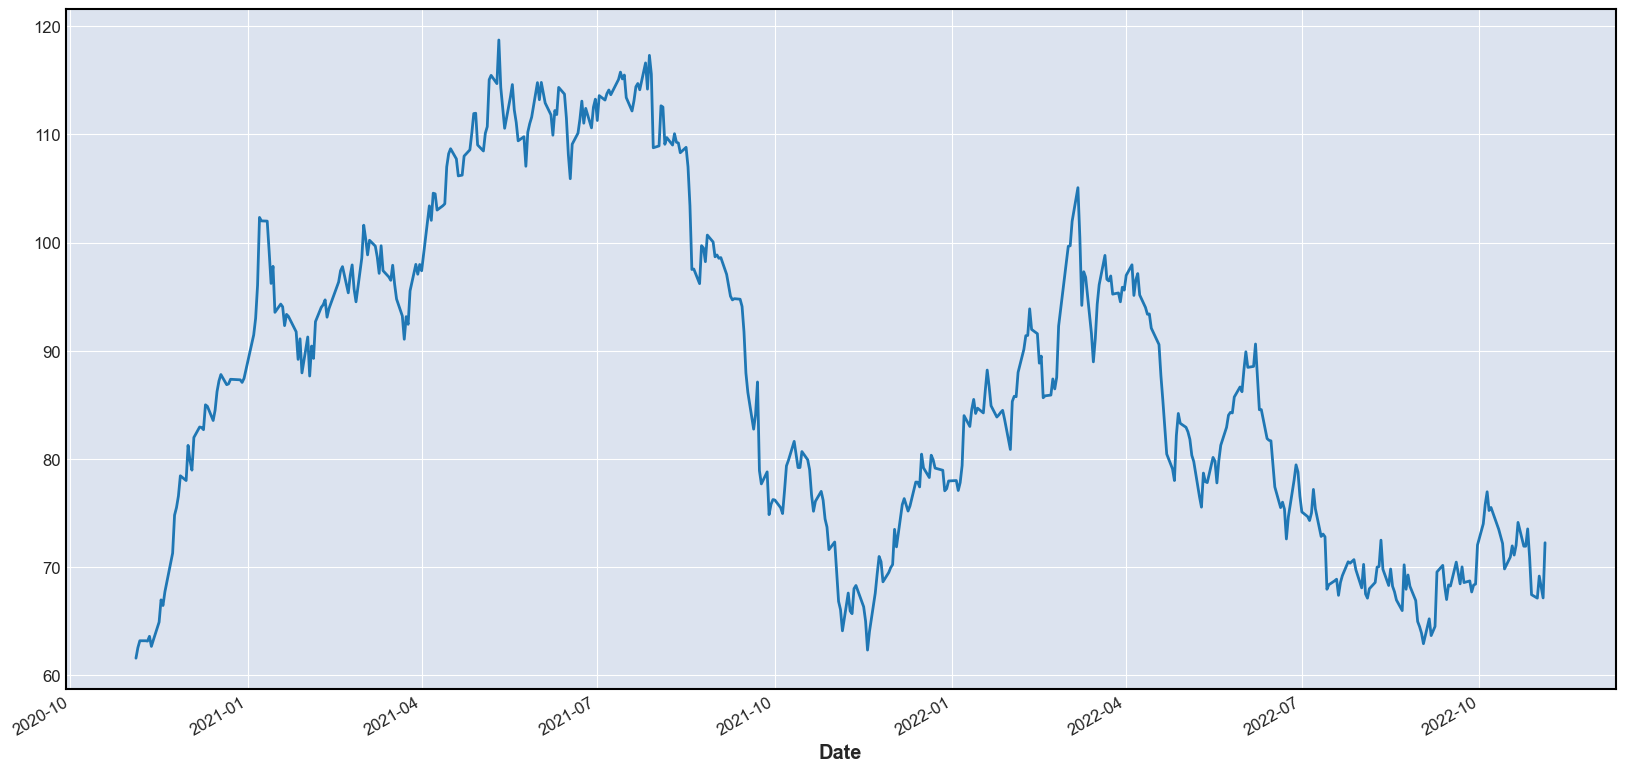

In [28]:
#caso discreto
precos.plot()

In [29]:
ret_disc_precos=precos.pct_change()
ret_disc_precos


Date
2020-11-04         NaN
2020-11-05    0.015752
2020-11-06    0.010232
2020-11-09    0.000000
2020-11-10   -0.000475
                ...   
2022-10-28   -0.048794
2022-10-31   -0.004744
2022-11-01    0.030389
2022-11-03   -0.029203
2022-11-04    0.075949
Name: Close, Length: 497, dtype: float64

<AxesSubplot:xlabel='Date'>

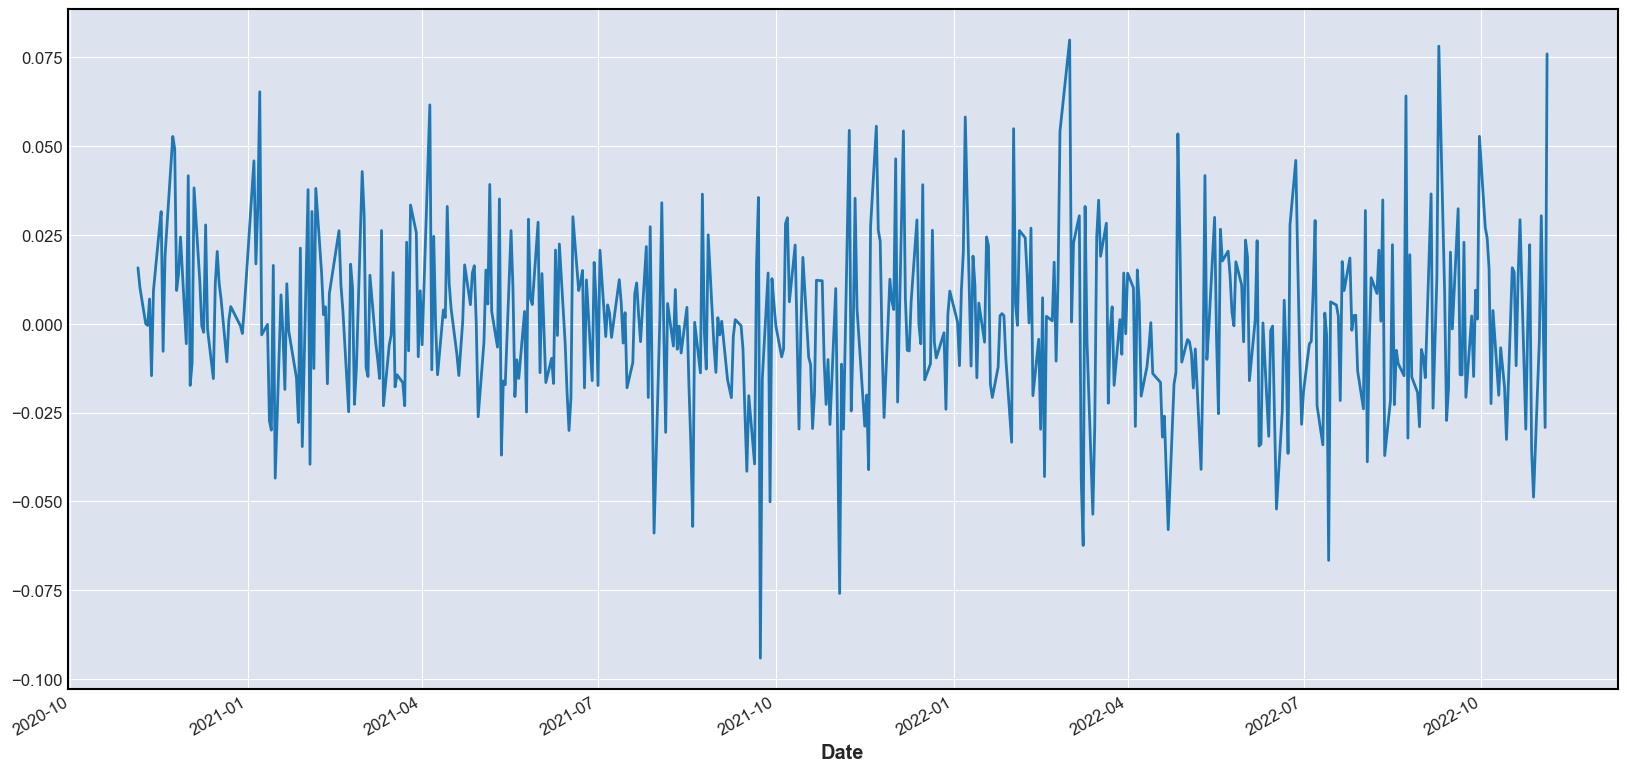

In [30]:
ret_disc_precos.plot()

In [31]:
#caso contínuo - retornos logarítimicos
#argumento do diff, se por 2 é a distância de 2 dias etc
ret_log=np.log(precos).diff()
ret_log



Date
2020-11-04         NaN
2020-11-05    0.015629
2020-11-06    0.010180
2020-11-09    0.000000
2020-11-10   -0.000475
                ...   
2022-10-28   -0.050025
2022-10-31   -0.004756
2022-11-01    0.029936
2022-11-03   -0.029638
2022-11-04    0.073203
Name: Close, Length: 497, dtype: float64

In [32]:
np.log(precos)

Date
2020-11-04    4.120337
2020-11-05    4.135966
2020-11-06    4.146146
2020-11-09    4.146146
2020-11-10    4.145671
                ...   
2022-10-28    4.211387
2022-10-31    4.206631
2022-11-01    4.236567
2022-11-03    4.206929
2022-11-04    4.280132
Name: Close, Length: 497, dtype: float64

<AxesSubplot:xlabel='Date'>

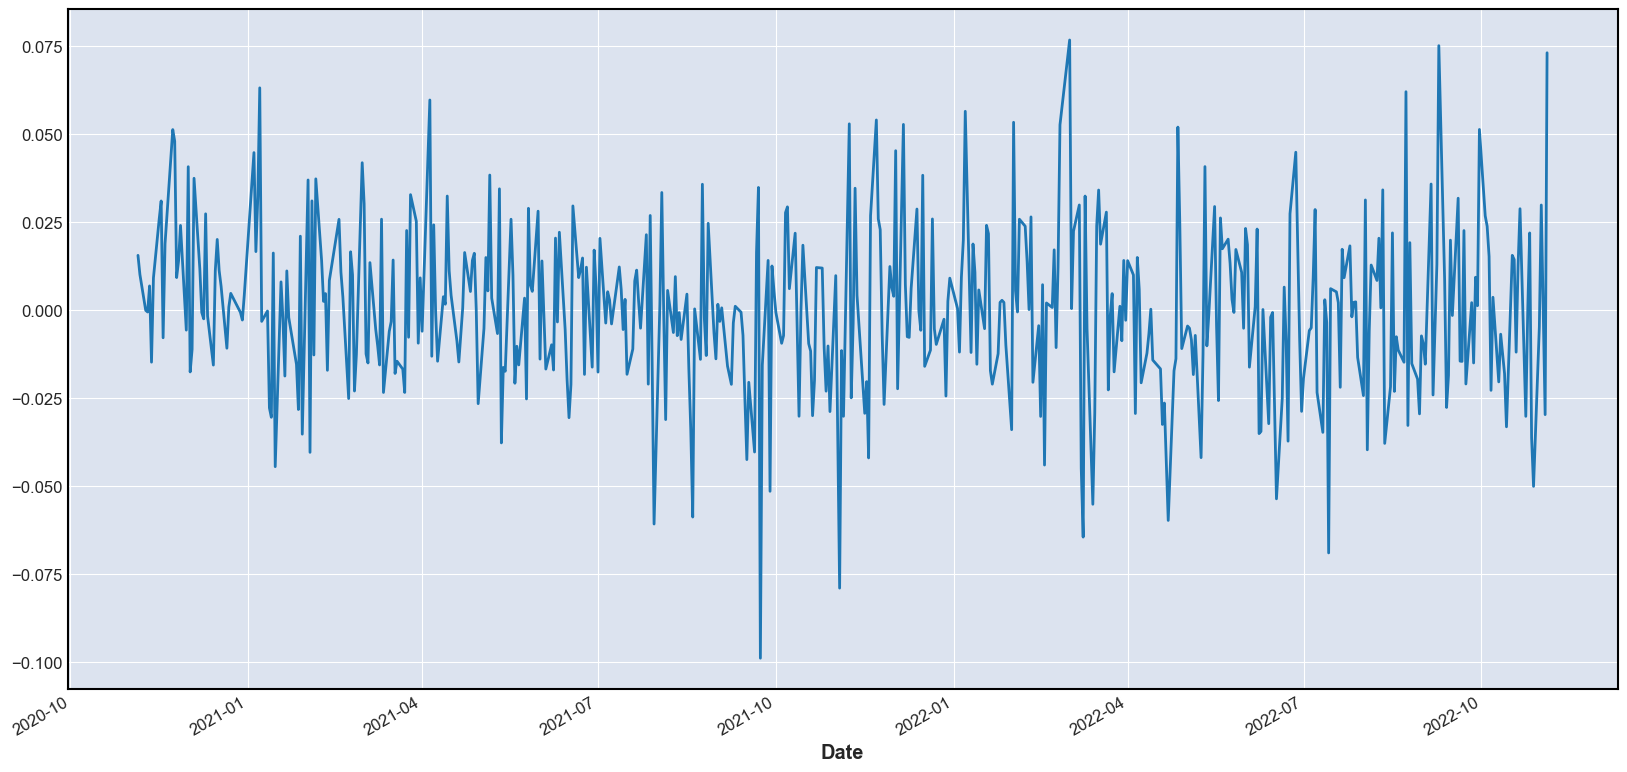

In [33]:
ret_log.plot()

### a-) Calcule o retorno  total (entre o valor final e o valor do começo) , pelo formato discreto (simples) e logarítmico das ações da Vale

In [34]:
mdata = pdr.DataReader('VALE3.SA',data_source='yahoo',start='2010-1-1',end='2022-11-04')['Adj Close']
mdata

[*********************100%***********************]  1 of 1 completed


Date
2010-01-04    26.098925
2010-01-05    26.342222
2010-01-06    26.899786
2010-01-07    27.011290
2010-01-08    27.274870
                ...    
2022-10-27    70.910004
2022-10-28    67.449997
2022-10-31    67.129997
2022-11-01    69.169998
2022-11-03    67.150002
Name: Adj Close, Length: 3186, dtype: float64

In [35]:
retorno = (mdata/mdata.shift(1)) -1
retorno.head()

Date
2010-01-04         NaN
2010-01-05    0.009322
2010-01-06    0.021166
2010-01-07    0.004145
2010-01-08    0.009758
Name: Adj Close, dtype: float64

In [36]:
#pq ele multiplicou por 250? DU no ano?
retorno_anual=retorno.mean()*250
retorno_anual

0.1598360050226736

In [37]:
retorno_vale = str(round(retorno_anual,5)*100) + '%'
print(retorno_vale)

15.984000000000002%


In [38]:
#retorno log
ret_log2=np.log(mdata).diff()
ret_log_anual=ret_log2.mean()*250
retorno_log_vale = str(round(ret_log_anual,5)*100) + '%'
print(retorno_vale)

15.984000000000002%


### c-) Faça um gráfico a série de log-retornos

<AxesSubplot:xlabel='Date'>

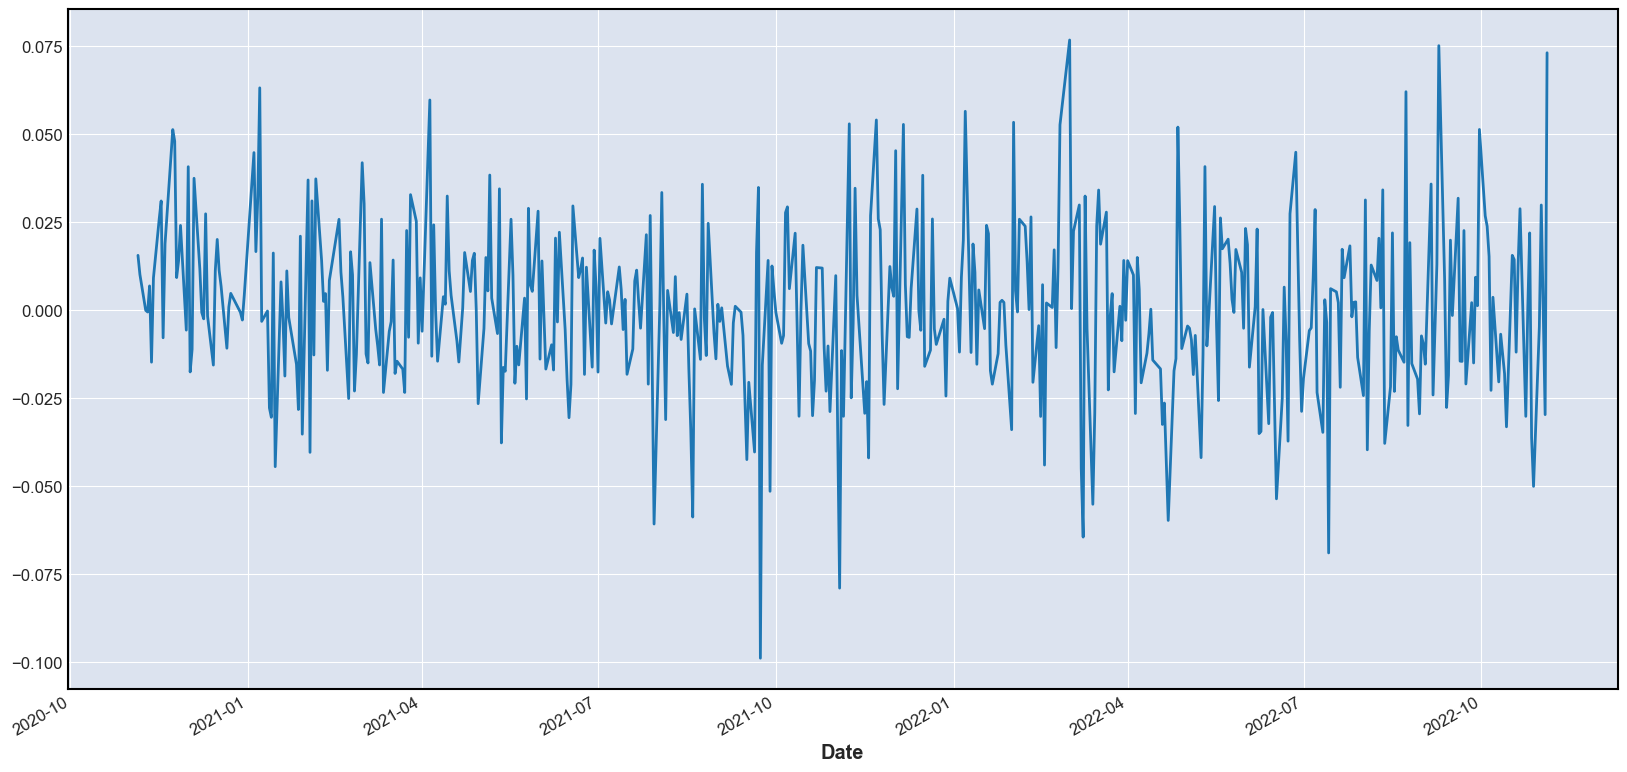

In [39]:
ret_log.plot()

## Volatilidade

<p align='center'>
"Volatilidade é risco, mas não é todo o risco" (escutei ou li em algum lugar)
</p>




Uma das mais tradicionais, e simplistas, formas de se representar o risco em finanças é pelo desvio padrão dos retornos, chamada também de _Close-to-close volatility_ ou _historical Volatility_:

$\sigma =  \sqrt{\frac{\sum{}^N_{i}(r_{i} - \bar{r})²}{N-1}} $

Anualizando a fórmula:

$\sigma_{a}=\sigma_{d} * \sqrt{252} $


Há alternativas para se mensurar a volatilidade, são elas
* _Desvio padrão móvel_ ou _Desvio padrão corrido_
* _Média Móvel Simples (Simple Moving Average - SMA)_
* _Média Móvel Poderada Exponêncial (Exponentially Weighted Moving Average - EWMA)_
* _Semi-desvio (Semi deviation)_: volatilidade de uma subamostra de retornos negativos
* Outras medidas mais complexas como:
    * Parkinson Volatility
    * Garman Klass Volatility
    * Rogers-Satchell Volatility
    * Yang Zhang Volatility

...

Por fim, fica a reflexão do camarada: 

<p align='center'>
    <img  src = "imagens/reflexão_vol.png">
</p>



0utras fontes:

* https://www.ivolatility.com/help/6.html#sma
* https://portfolioslab.com/tools

### Calcule a volatilidade nas formas: histórica (retornos diários), histórica anualizada,  desvio padrão móvel , SMA e EWMA

In [40]:
#volatilidade anual
retorno.std()*(252)**(1/2)

0.41543909521952915

<AxesSubplot:xlabel='Date'>

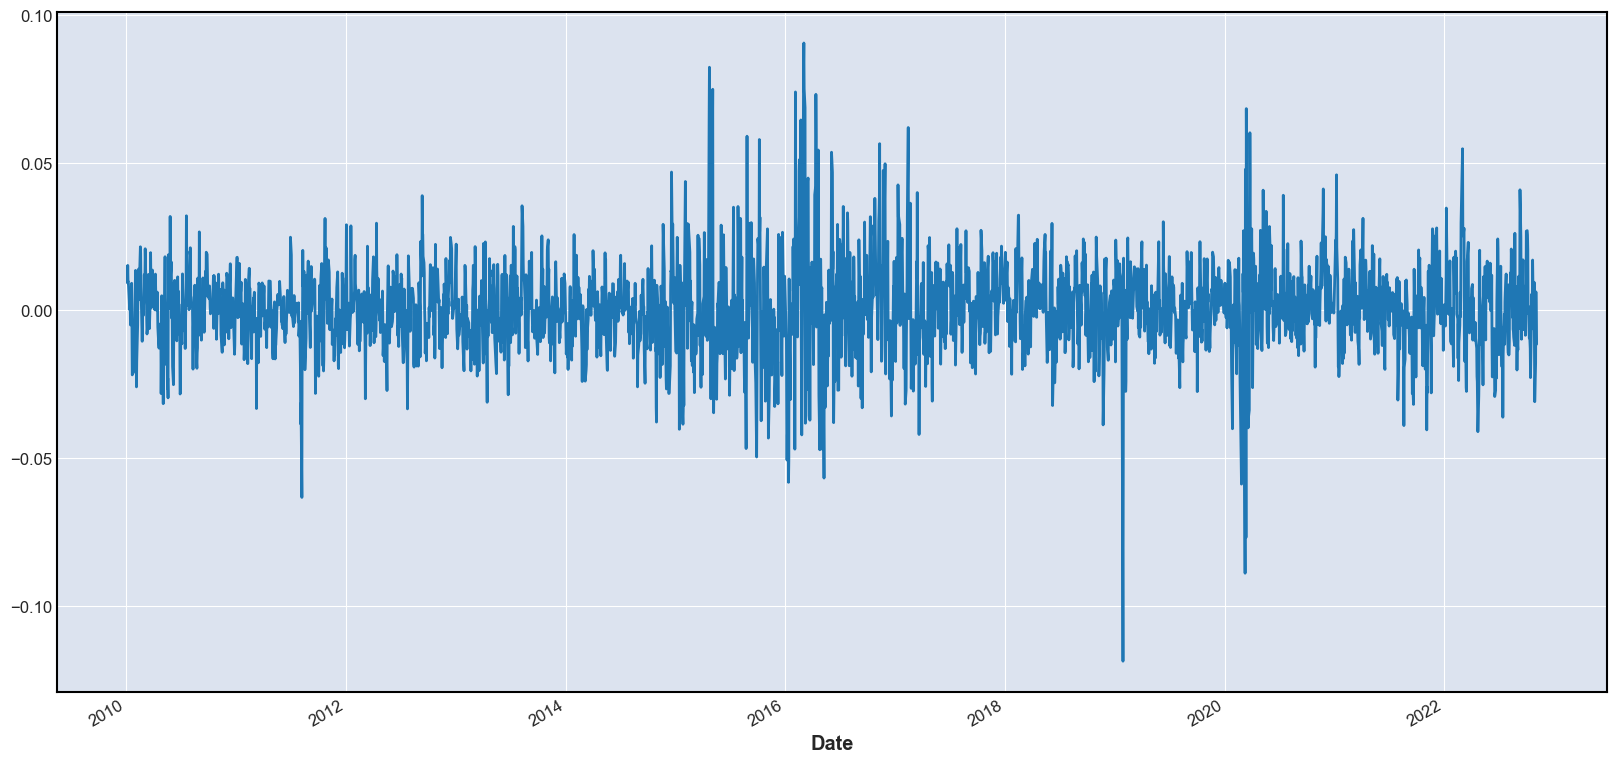

In [41]:
#EWMA - You can use the ewm() function in Pandas to calculate exponentially weighted moving averages. You can pass the smoothing value directly through alpha or make your life easier with the span parameter.
x=retorno.ewm(span=3, adjust=False).mean()
x.plot()

In [42]:
#volatilidade diária
retorno.std()

0.026170203115346583

In [43]:
#retornos diários
retorno = (mdata/mdata.shift(1)) -1
retorno.head()

Date
2010-01-04         NaN
2010-01-05    0.009322
2010-01-06    0.021166
2010-01-07    0.004145
2010-01-08    0.009758
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

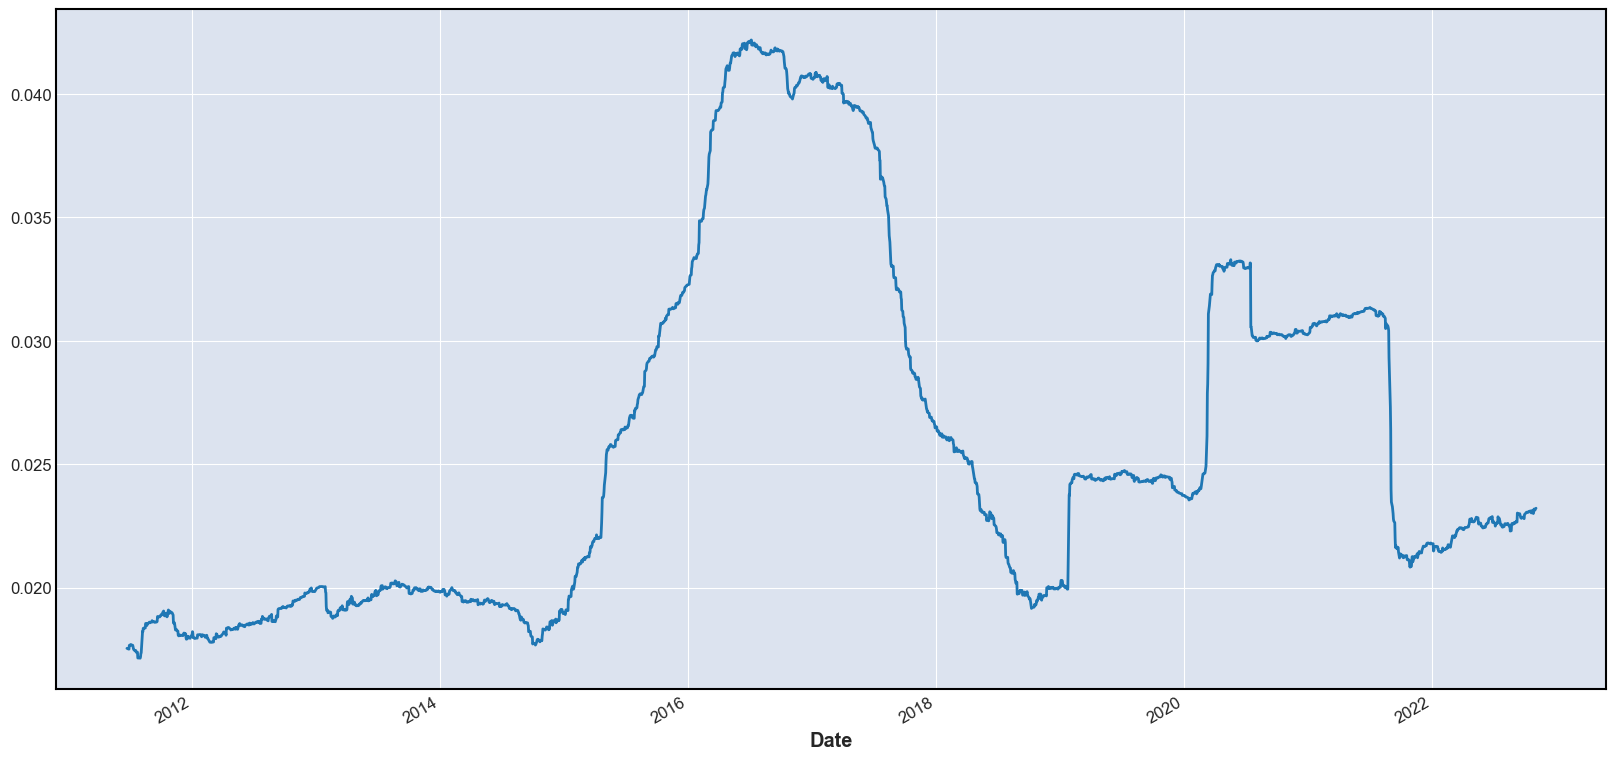

In [44]:
#SMA-média móvel por ano
media_vol=retorno.rolling(window=365).std()
media_vol.plot()

<AxesSubplot:xlabel='Date'>

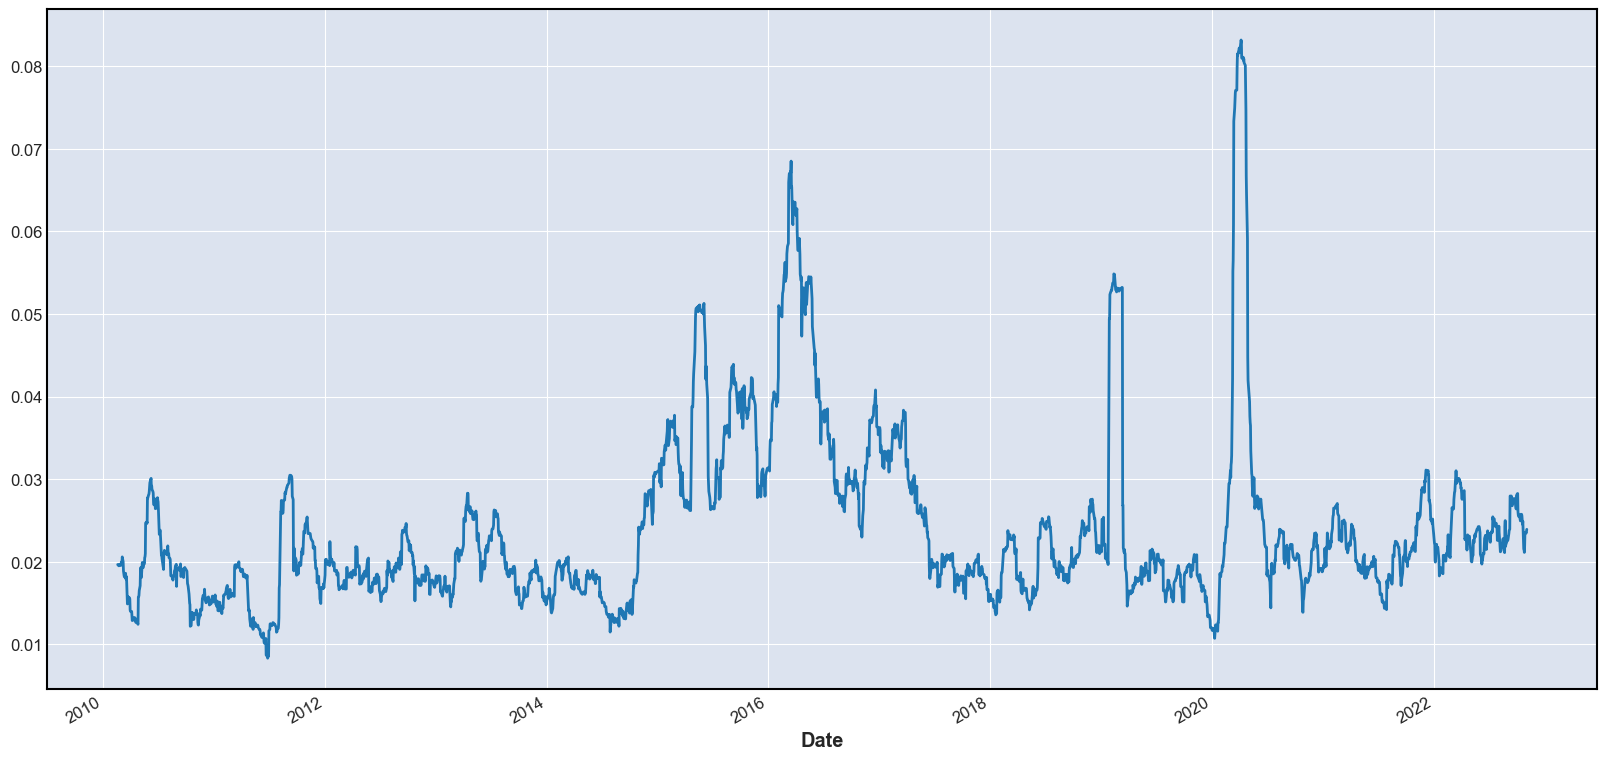

In [45]:
#SMA-média móvel por mês
media_vol=retorno.rolling(window=30).std()
media_vol.plot()

### __Desafio__: escolha uma das formas mais "complexas" e calcule a volatilidade

#volatilidade histórica Parkinson
Um questionamento que muito Jr. assim como eu já deve ter feito ao mensurar a volatilidade histórica: se analisarmos apenas o fechamento dos preços, perdemos dados da movimentação intradiária do papel, ou seja, se o preço de fechamento do ativo em D-1 foi 10 dinheiros, e o fechamento de hoje é 10 dinheiros a variação da vol é mínima dependendo do modelo que estiver utilizando

In [46]:
df = web.DataReader('VALE3.SA', data_source='yahoo', start=f'2018-01-01', end='2021-08-31')
display(df)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,40.439999,41.740002,40.439999,41.720001,29.179222,14156500
2018-01-03,41.830002,41.880001,41.299999,41.470001,29.004368,12744200
2018-01-04,41.810001,42.369999,41.520000,41.639999,29.123262,18433000
2018-01-05,41.570000,42.290001,41.310001,42.290001,29.577883,15251300
2018-01-08,42.400002,43.230000,42.400002,43.230000,30.235327,14542800
...,...,...,...,...,...,...
2021-08-24,99.379997,101.269997,99.099998,99.709999,82.696747,29779200
2021-08-25,100.089996,100.459999,98.550003,99.500000,82.522575,15088600
2021-08-26,99.489998,99.800003,98.230003,98.230003,81.469276,18032300


In [47]:
#não sei pq está dando errado???????
ticker = 'VALE3.SA'
acao = yf.download(ticker, period='3y')
print(acao.head())

parhv = np.sqrt(252 / (4 * 22 * np.log(2)) 
            pd.DataFrame.rolling(np.log(acao.loc[:, 'High'] / acao.loc[:, 'Low']) ** 2, window=22).sum())


plt.figure(figsize=(20,10))
plt.plot(parhv, label='Parkinson HV')
plt.legend(loc='upper left')
plt.title('Parkinson Historical Volatility')

SyntaxError: invalid syntax (3359472177.py, line 7)

----

## 4-) Estatística

<img src = "https://www.meme-arsenal.com/memes/e67609cded2cb9c7f9f120ffc8a0e5ea.jpg" >

<p align='center'>
    "As estatísticas corretas nos deixam sempre uma falsa impressão" - Stanislaw Ponte Preta, pseudônimo do Jornalista Sérgio Porto (1923-1968)
</p>

<p align='center'>    
    "Usa-se a estatística como um homem bêbado usa um poste, mais para apoiar que para iluminar" - Andrew Lang (1844-1912)
</p>

<p align='center'>    
    "I can prove anything by statistics except the truth." - George Canning
</p>





Estatística é uma área extremamente ampla, cujas ferramentas são primordiais para as Finanças ao embasarem diversas teorias, conceitos e fórmulas. Além disso, modelos estatísticos mais avançados são a base do Aprendizado de Máquinas (ou Aprendizado Estatístico), o qual encontra cada vez mais espaço nas finanças e possibilita estratégias de investimentos sistemáticos. Encontraremos alguns de suas apliações nos próximos desafios, por agora iremos focar em testar a normalidade dos retornos. 



Para isso é necessário ter em mente o conceito de __distribuição normal__ e desvios da normalidade, como __skewness__ e __kurtosis__. É importante lembrar que,por mais imperfeito que isso possa parecer, a ideia de que os retornos de instrumentos financeiros seguem uma distribuição normal embasa diversas teorias como 

* Teoria das Carteiras 
* Modelo de precificação dos ativos (Capital Asset Pricing Model - CAPM)
* Hipótese dos Mercados Eficientes (Efficient Market Hypotesis - EMH)
* Precificação de Opções

obs: recomendo utilizarem os pacotes  __statsmodels.api__ e __scipy.stats__ 

### a-) Uma forma de checarmos graficamente se os retornos seguem uma distribuição normal é fazendo o histograma dos log-retornos. Para as ações da Vale, do Itaú, da Klabin e da Minerva; faça  um histograma 


Dica: utilize a função do matplotlib da seguinte maneira __plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency', color='b')__

In [48]:
from matplotlib import pyplot as plt
plt.hist(ret_log.flatten(), bins=70, normed=True, label='frequency', color='b')

AttributeError: 'Series' object has no attribute 'flatten'

AttributeError: 'Rectangle' object has no property 'normed'

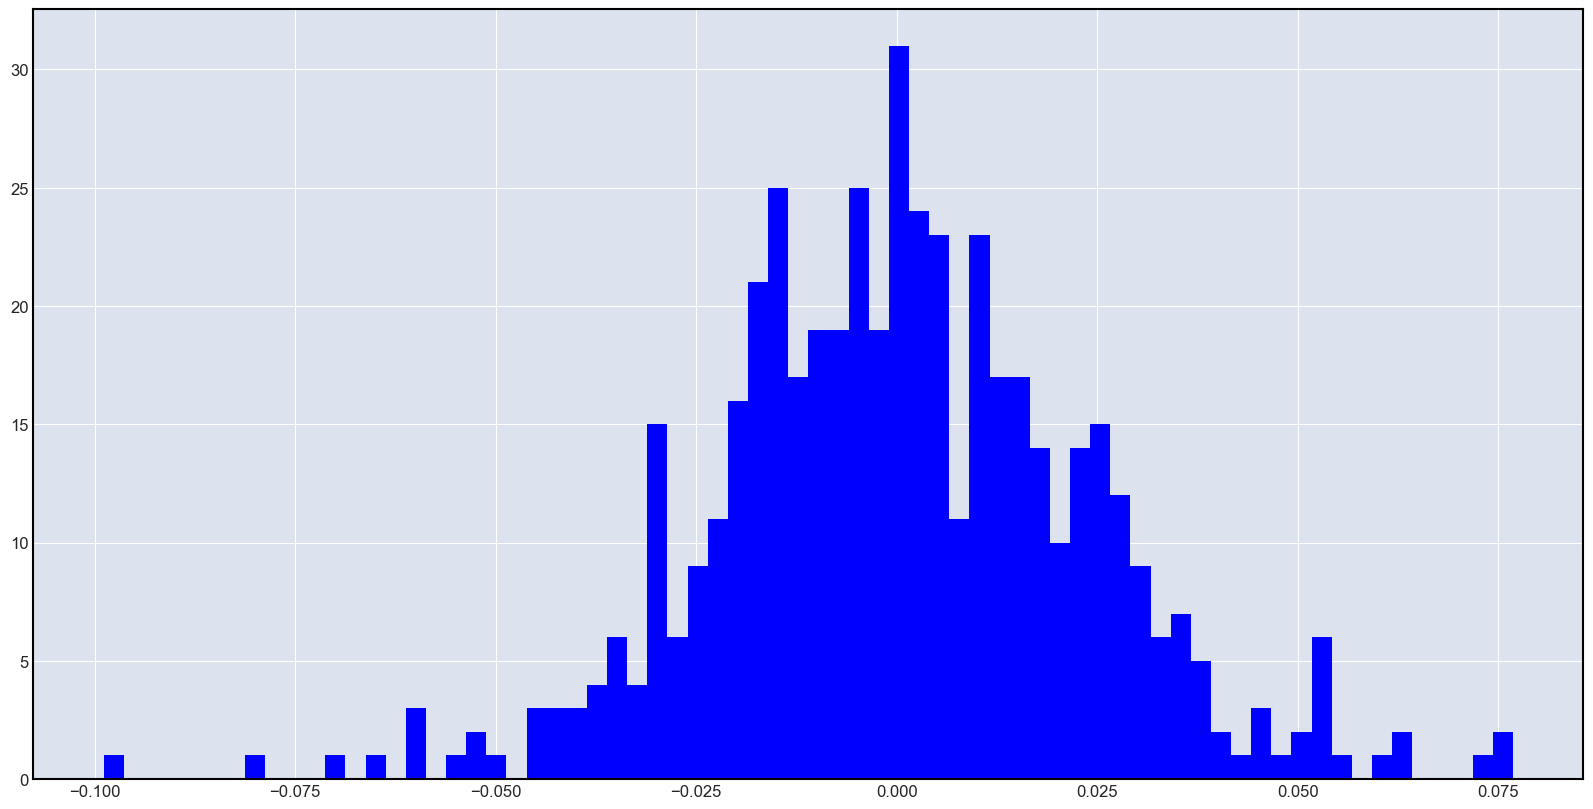

In [53]:
#o argumento ret_log.flatten() dá problema
ret_log.plot.hist(bins=70, normed=True, label='frequency', color='b')

### b-) Outro teste gráfico é o Quantile-Quantile plots, ou QQ-plots. Procure saber sobre sua explicação. Escolha uma ação e faça uma "Plotagem" https://www.youtube.com/watch?v=JfnHsWhGRBk


In [56]:
#dando erro????
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

AttributeError: module 'numpy' has no attribute 'ret_log'

In [62]:
df = web.DataReader('VALE3.SA', data_source='yahoo', start=f'2018-01-01', end='2021-08-31')
display(df)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,40.439999,41.740002,40.439999,41.720001,29.179218,14156500
2018-01-03,41.830002,41.880001,41.299999,41.470001,29.004370,12744200
2018-01-04,41.810001,42.369999,41.520000,41.639999,29.123266,18433000
2018-01-05,41.570000,42.290001,41.310001,42.290001,29.577885,15251300
2018-01-08,42.400002,43.230000,42.400002,43.230000,30.235319,14542800
...,...,...,...,...,...,...
2021-08-24,99.379997,101.269997,99.099998,99.709999,82.696747,29779200
2021-08-25,100.089996,100.459999,98.550003,99.500000,82.522575,15088600
2021-08-26,99.489998,99.800003,98.230003,98.230003,81.469276,18032300


In [74]:
df=df.sort_values(by=['Date'],ascending=True).reset_index()
df['count']=df.index + 1
n_rows=df.shape[0]
from scipy.special import ndtri

In [77]:
df['percentil']=(df['count'])/n_rows
df['theorical']=ndtri(df['percentil'])

In [84]:
df['z_actual']=(df['Close']-df['Close'].mean())/df['Close'].std(ddof=0)
df

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume,nova_coluna,count,percentil,theorical,z_actual
0,0,30,2018-01-02,40.439999,41.740002,40.439999,41.720001,29.179218,14156500,-0.908495,1,0.001104,-3.060794,-0.911527
1,1,20,2018-01-03,41.830002,41.880001,41.299999,41.470001,29.004370,12744200,-0.917561,2,0.002208,-2.846879,-0.922978
2,2,28,2018-01-04,41.810001,42.369999,41.520000,41.639999,29.123266,18433000,-0.911396,3,0.003311,-2.715253,-0.915192
3,3,44,2018-01-05,41.570000,42.290001,41.310001,42.290001,29.577885,15251300,-0.887822,4,0.004415,-2.618566,-0.885420
4,4,77,2018-01-08,42.400002,43.230000,42.400002,43.230000,30.235319,14542800,-0.853732,5,0.005519,-2.541508,-0.842366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,901,802,2021-08-24,99.379997,101.269997,99.099998,99.709999,82.696747,29779200,1.866613,902,0.995585,2.618566,1.744532
902,902,799,2021-08-25,100.089996,100.459999,98.550003,99.500000,82.522575,15088600,1.857582,903,0.996689,2.715253,1.734913
903,903,794,2021-08-26,99.489998,99.800003,98.230003,98.230003,81.469276,18032300,1.802964,904,0.997792,2.846879,1.676745
904,904,806,2021-08-27,99.010002,101.000000,98.900002,100.690002,83.509537,19572800,1.908760,905,0.998896,3.060794,1.789418


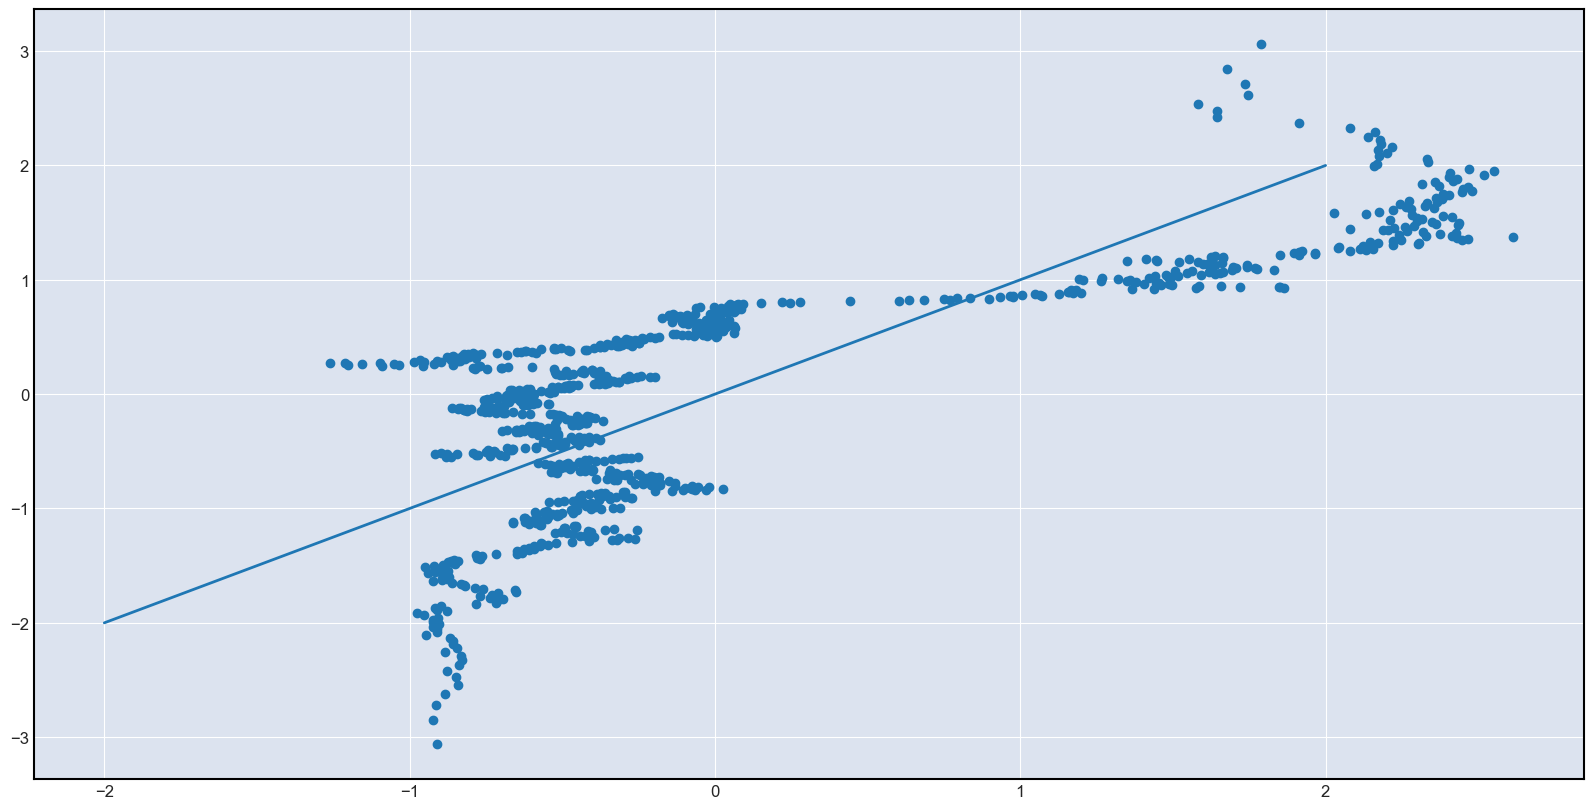

In [85]:
plt.scatter(df.z_actual,df.theorical)
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2])

### c-) Visualizações gráficas não são suficientes. Calcule um conjunto de estatísticas (recomendo fazer uma função), contendo o tamanho da amostra, mínimo, máximo, média, desvio padrão, skew e kurtosis; para duas ações de sua escolha. Compare os valores

Skewness = 0: Então normalmente distribuído.
Skewness > 0: Então, mais peso na cauda esquerda da distribuição.-positivamente assimetrica
Skewness < 0: Então, mais peso na cauda direita da distribuição.

Para uma distribuição com curtose < 3: é chamada playkurtic.
Para uma distribuição com curtose > 3, é chamada de leptocúrtica e significa que ela tenta produzir mais valores discrepantes do que a distribuição normal.

In [149]:
# Importing library
from scipy.stats import skew 
from scipy.stats import kurtosis
from scipy.stats import skewtest

In [121]:
lista=['VALE3.SA','PETR4.SA']
n=0
for i in lista:
    df = web.DataReader(i, data_source='yahoo', start=f'2018-01-01', end='2021-08-31')
    n=n+1
    print(f'Para a ação {i}')
    print(df['Adj Close'].std())
    print(df['Adj Close'].mean())
    print(df['Adj Close'].min())
    print(df['Adj Close'].max())
    print(df['Adj Close'].shape[0])
    print(skew(df['Adj Close'], axis=0, bias=True))
    print(kurtosis(df['Adj Close'], axis=0, bias=True))

[*********************100%***********************]  1 of 1 completed
Para a ação VALE3.SA
19.295498227250345
46.69940028074824
25.473506927490234
97.28540802001953
906
1.4388248282471081
0.6030925498394484
[*********************100%***********************]  1 of 1 completed
Para a ação PETR4.SA
2.416571590631193
12.798377217046472
6.1287522315979
16.93964195251465
906
-0.3784885939693472
-0.7452331160202528


In [134]:
df_v = web.DataReader('VALE3.SA', data_source='yahoo', start=f'2018-01-01', end='2021-08-31')
desvio_padrao_vale=df_v['Adj Close'].std()
media_vale=df_v['Adj Close'].mean()
min_vale=df_v['Adj Close'].min()
max_vale=df_v['Adj Close'].max()
shape_vale=df_v['Adj Close'].shape[0]
skew_vale=skew(df_v['Adj Close'], axis=0, bias=True)
kut_vale=kurtosis(df_v['Adj Close'], axis=0, bias=True)


[*********************100%***********************]  1 of 1 completed


In [139]:
df_p = web.DataReader('PETR4.SA', data_source='yahoo', start=f'2018-01-01', end='2021-08-31')
desvio_padrao_p=df_p['Adj Close'].std()
media_p=df_p['Adj Close'].mean()
min_p=df_p['Adj Close'].min()
max_p=df_p['Adj Close'].max()
shape_p=df_p['Adj Close'].shape[0]
skew_p=skew(df_p['Adj Close'], axis=0, bias=True)
kut_p=kurtosis(df_p['Adj Close'], axis=0, bias=True)
print(skew_p,skew_vale)

[*********************100%***********************]  1 of 1 completed
-0.3784885824645221 1.4388248305186535


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'skew and kurtosis')

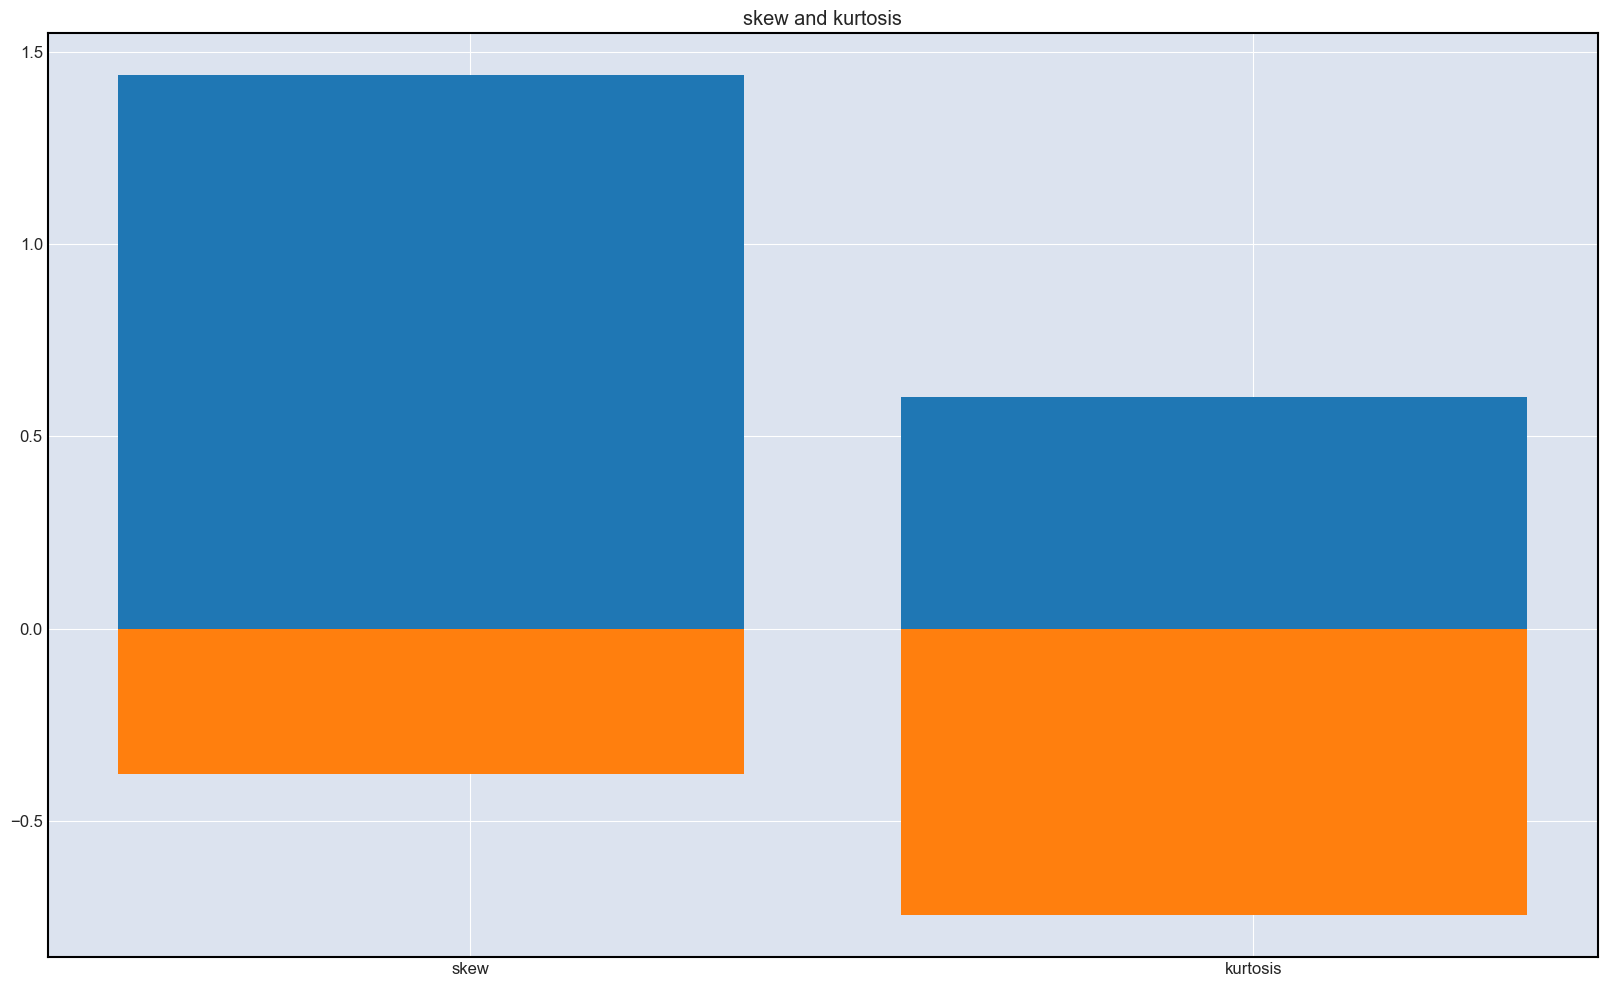

In [141]:

plt.figure(figsize=(20, 12))
labels=['skew','kurtosis']
ind=np.arange(len(labels))
width=0.1
bar_08=plt.bar(ind,[skew_vale,kut_vale])
bar_18=plt.bar(ind,[skew_p,kut_p])

location=ind+width/2
labels=labels
plt.xticks(location,labels)
plt.legend()
plt.title('skew and kurtosis')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'VALE3 X PETR4: média, máxima, mínima, desvio padrão')

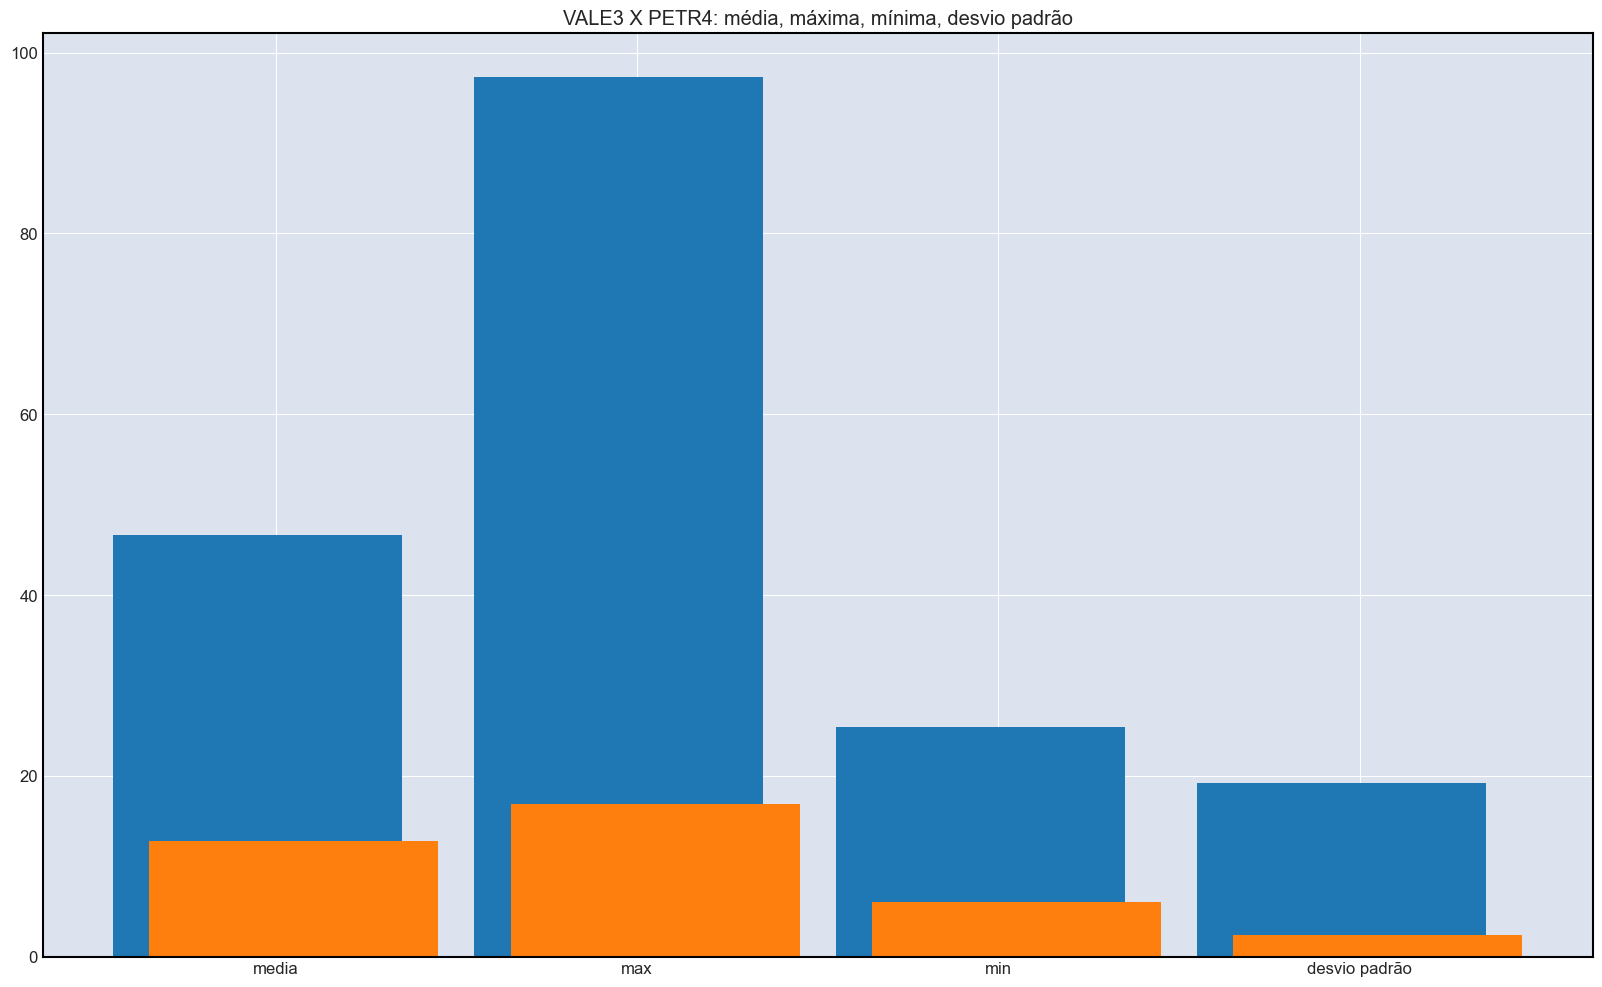

In [144]:
#como comparar os valores?
plt.figure(figsize=(20, 12))
labels=['media','max','min','desvio padrão']
ind=np.arange(len(labels))
width=0.1
bar_08=plt.bar(ind,[media_vale,max_vale,min_vale,desvio_padrao_vale])
bar_18=plt.bar(ind+width,[media_p,max_p,min_p,desvio_padrao_p])

location=ind+width/2
labels=labels
plt.xticks(location,labels)
plt.legend()
plt.title('VALE3 X PETR4: média, máxima, mínima, desvio padrão')

In [146]:
#tamanho da amostra é a mesma

### d-) Faça testes estatísticos de signficância estatística para as ações que escolheu anteriormente. Eles podem ser obtidos pelas funções do scipy.stats:

* skewtest()
* kurtosistest()
* normaltest()

obs:os retornos __não__ são normalmente distribuídos caso o valor-p for abaixo de 0.05


Responda, posteriormente, se os retornos das ações escolhidas são normalmente distribuídos

In [153]:
#fazer depois

AttributeError: 'DataFrame' object has no attribute 'kurtosintest'

----

## 5-) Processos estocáticos  


<img src = 'http://media3.giphy.com/media/YPBvdXHxANHHi/giphy.gif'>


<p align='center'>
"Predictability is not how things will go, but how they can go"- Raheel Farooq
</p>


<p align='center'>
"A fortuna troca, às vezes, os cálculos da natureza" - Machado de Assis (1839-1908)
</p>


### Introdução

Um processo estocástico, a grosso modo, é uma sequência de variáveis aleatórias. A palavra estocástica significa probabilística, oposta à Ao palavra determinística em que por meio de uma equação é possível saber o resultado exato (pense numa equação y = ax + b, caso conhecermos todos os parâmetros, a partir de uma observação de x poderemos __determinar__ o y).

Caso queira saber mais (não será necessário para resolver o exercício), acesse os links:

* [Cadeias de Markov: Caminhadas aleatórias (Teoria e Simulação) - Aula 3](https://www.youtube.com/watch?v=cwhQYqR_Iag&list=PLSc7xcwCGNh0jSylDm0QrDJaFTC3vAbvc&index=5) 
* [O que são processos estocásticos?](https://www.youtube.com/watch?v=WOWi6dswgkY&list=PLSc7xcwCGNh0jSylDm0QrDJaFTC3vAbvc&index=1)

Dentro desse assunto temos o conceito de "passeios aleatórios", que são objetos matemáticos cujos caminhos consistem em, como o próprio nome sugere, uma sucessão de movimentos aleatórios, podendo representar o deslocamento de uma molécula em um gás, processos de difusão de partículas, o andar de um bêbado, ou o comportamento de ativos no mercado financeiro, já que eles sofrem diversas influências externas, fazendo seu movimento ser entendido como aleatório (tornando-os difíceis de serem previstos).

### a-) Gere uma série de retornos "previstos" por uma caminhada aleatória 

In [ ]:
#Pesquisar depois como faz

----

## 6-) Portfólio de investimento



### Métricas de desempenho de uma carteira de investimentos

__Retorno__:  

No tópico 2, já vimos como calcular o retorno de um portfólio com dois  ativos. Segue a generalização:

$R_p = R_{a1}w_{a1} + R_{a2}w_{a2} + R_{a3}w_{a3} + ...+ R_{an}w_{an}$

* $R_p$: retorno do portfólio
* $R_{an}$: retorno do ativo "n"
* $w_{an}$ : peso do ativo "n"

Uma maneira mais eficiente de generalizá-la é através da fórmula matricial, dada por: 
$R_p = \vec{r} \times \vec{w}$

* $\vec{r}$ : vetor contendo o retorno dos ativos
* $\vec{w}$ : vetor contendo o peso dos ativos na carteira

obs: a soma dos pesos precisa ser igual a 1, por hora, assuma que os pesos não podem ser negativos (não estaremos vendidos em nenhuma ação, apenas comprados)
 

__Volatilidade__:

Contraintuitivamente, a volatilidade de um portfólio não é calculada a partir do desvio padrão de seus retornos. Sua fórmula (matricial) é a seguinte:

$\sigma_{P} = \sqrt{w_{T} \cdot \Sigma{}  \cdot w}$


* $\sigma_{P}$ : volatilidade do portfólio
* $\Sigma$ : matriz de covariância dos retornos
* $w$: pesos dos ativos
* $w_{T}$: peso dos ativos transpostos

### Você deverá montar um portfólio com 10 ações. Como você já sabe importar dados financeiros, fique livre para escolher os ativos/ações de seu preferência,  
designando os pesos para cada um dos ativos ou optand. 

### a-) Calcule o retorno anualizado do portfólio

In [ ]:
#vamos caregar o modulo pandas
import pandas as pd
#importar biblioteca do pandas datareader
from pandas_datareader import data as pdr
#importar a bliblioteca Numpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=1
print(a)

1


In [17]:
carteira=['VALE3.SA','PETR4.SA','KLBN11.SA','MGLU3.SA','NERV','ITUB','BBD','B3SA3.SA','ABEV']
data = pd.DataFrame()
for t in carteira:
    data[t] = pdr.DataReader(t,data_source='yahoo',start='1995-1-1',end='2020-3-4')['Adj Close']
    


In [19]:
data.tail()

,VALE3.SA,PETR4.SA,KLBN11.SA,MGLU3.SA,NERV,ITUB,BBD,B3SA3.SA,ABEV
Date,,,,,,,,,
2020-02-27,33.220150,13.734050,18.069363,12.254087,57.439999,5.362772,6.139200,13.588212,3.029929
2020-02-28,33.100620,13.755764,17.551798,12.319930,58.240002,5.455365,6.194014,14.166684,2.992638
2020-03-02,34.632023,14.401754,18.550604,12.814972,60.400002,5.504777,6.294507,14.756962,3.085866
2020-03-03,34.624546,14.141185,18.841169,12.888129,61.840000,5.365807,6.078778,14.641860,3.057898
2020-03-04,36.282940,14.597178,20.057899,12.790586,69.120003,5.373527,6.097061,14.694984,3.169772


In [20]:
retorno = (data/data.shift(1)) -1
retorno

,VALE3.SA,PETR4.SA,KLBN11.SA,MGLU3.SA,NERV,ITUB,BBD,B3SA3.SA,ABEV
Date,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.023810,-0.055319,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2000-01-05,0.000000,-0.010091,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2000-01-06,0.000000,-0.003458,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2000-01-07,0.036585,0.004566,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...
2020-02-27,-0.019404,-0.034720,-0.011916,-0.049735,-0.023129,-0.005722,-0.010309,-0.039833,-0.089636
2020-02-28,-0.003598,0.001581,-0.028643,0.005373,0.013928,0.017266,0.008929,0.042572,-0.012308
2020-03-02,0.046265,0.046961,0.056906,0.040182,0.037088,0.009058,0.016224,0.041667,0.031153


In [21]:
pesoscarteira = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
retorno_anual = retorno.mean() * 250
retorno_anual

VALE3.SA     0.231155
PETR4.SA     0.177941
KLBN11.SA    0.180313
MGLU3.SA     0.540604
NERV         0.487005
ITUB         0.291536
BBD          0.298773
B3SA3.SA     0.101340
ABEV         0.234348
dtype: float64

In [22]:
np.dot(retorno_anual, pesoscarteira)
portifolio_1= str(round(np.dot(retorno_anual, pesoscarteira),5)*100) + '%'
print (portifolio_1)

25.430000000000003%


### b-) Calcule a volatilidade anualizada do portfólio

In [24]:
retorno.std()*(252)**(1/2)

VALE3.SA     0.402689
PETR4.SA     0.409985
KLBN11.SA    0.278898
MGLU3.SA     0.581291
NERV         1.167008
ITUB         0.464225
BBD          0.464391
B3SA3.SA     0.481656
ABEV         0.351764
dtype: float64

### c-) Calcule os retornos diários do portfólio, calcule seu retorno acumulativo e compare com algum Benchmark (CDI, IBOVESPA, IBrX)

In [30]:
#retorno diário
retorno

,VALE3.SA,PETR4.SA,KLBN11.SA,MGLU3.SA,NERV,ITUB,BBD,B3SA3.SA,ABEV
Date,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.023810,-0.055319,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2000-01-05,0.000000,-0.010091,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2000-01-06,0.000000,-0.003458,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2000-01-07,0.036585,0.004566,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...
2020-02-27,-0.019404,-0.034720,-0.011916,-0.049735,-0.023129,-0.005722,-0.010309,-0.039833,-0.089636
2020-02-28,-0.003598,0.001581,-0.028643,0.005373,0.013928,0.017266,0.008929,0.042572,-0.012308
2020-03-02,0.046265,0.046961,0.056906,0.040182,0.037088,0.009058,0.016224,0.041667,0.031153


In [31]:
#retorno acumulativo
retorno.sum()

VALE3.SA     4.692445
PETR4.SA     3.612194
KLBN11.SA    1.094859
MGLU3.SA     4.746500
NERV         2.606448
ITUB         4.979428
BBD          4.973980
B3SA3.SA     1.238779
ABEV         4.485424
dtype: float64

### d-) Provavelmente já deve ter se deparado com o conceito de correlação em estatística. Faça a matriz de correlação (método de person) para os ativos do portfólio que montou. Com o intuito de aumentar a elegância, faça um heatmap dessa matriz.Por fim, reflita o que a correlação entre os ativos pode dizer sobre seu portfólio. Para ajudar na sua reflexão fique com a frase de Harry Markowitz: “Tratando-se de finanças, diversificação é o único almoço grátis”

In [37]:
correlation=data.corr()

In [38]:
import seaborn as sn

<AxesSubplot:>

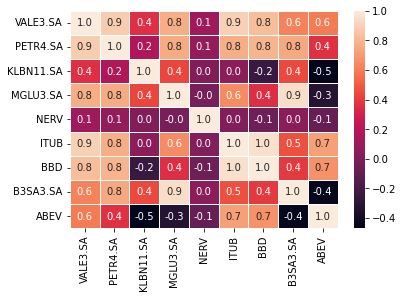

In [39]:
# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

### Teoria moderna das carteiras (Modern Portfolio Theory - MPT)

__Pressupostos__:

* Não é possível estar vendido em uma ação (short)
* 100% da riqueza do invstidor necessita estar depositada (soma dos pesos igual a 1)
* _Trade-off_ entre risco e retorno: maior incerteza (risco) é compensada com maior recompensa (retorno)
* Retorno Esperado no futuro: média do retorno histórico (conceito de esperança matemática) 

__Explicação básica__:

* Podemos compor diversos portfólios diferentes ao alterarmos o peso dado aos ativos
* Diferentes pesos resultam em diferentes pares (risco, retorno)
    * Mudar os pesos = ajustar a exposição do investidor ao risco  
* O desafio é: encontrar uma combinação de pesos para maximizar o retorno, dado um nível de risco
    *  Tal combinação resulta em um __portfólio eficiente__
* A região do gráfico (retorno esperado, vol) onde se encontram os portfólios eficientes é chamada de fronteira eficiente


### e-) Plote um gráfico contendo a relação riscoXretorno de diversos portfólios possíveis. Evidencie a Fronteira eficiente

In [41]:
import math as m
from random import sample
#sample não quero valores repetidos

In [49]:
while pesoscarteira.sum()<>100:
pesoscarteira=np.random.randint(100,size=(9))
pesoscarteira



array([30, 47, 73, 17, 63, 48,  0, 38, 38])

In [50]:
#desvio padrão é o risco da carteira
variancia_carteira=np.dot(pesoscarteira,np.dot(retorno.cov()*252,pesoscarteira))
risco_carteira=np.round(m.sqrt(variancia_carteira),1)
risco_carteira/100

1.077

In [56]:
np.dot(retorno_anual, pesoscarteira)
portifolio_al= str(round(np.dot(retorno_anual, pesoscarteira),5)) + '%'
print (portifolio_al)

95.08209%


In [ ]:
#falta por varios portifolios, plotar o gráfico e achar a froteira eficiente

### EXTRA: reflita sobre quais os problemas e limitações da teoria de Markowitz (pesquise a vontade)

----

## 7-) Gestão de Risco

<p align='center'>
"Um navio no porto está em segurança, mas não é para isso que os navios são feitos" - John Sheed
</p>

<p align='center'>
"O pior risco é não correr risco nenhum" - Nicolas Sarcozy
</p>

<p align='center'>
"Há duas ocasiões na vida em que uma pessoa não deve jogar: quando não tiver posse para isso ... e quando tiver" - Mark Twain
</p>

Como você já deve saber, risco em finanças emerge da incerteza de futuros lucros ou retornos. A Gestão de risco financeiro moderna é algo extremamente objetivo. Por mais que sejam utilizados ferramentais matemáticos e estatísticos (tomando um caráter científico), modelos de risco sempre estão sujeitos a serem aplicados incorretamente, a terem pressupostos errados ou a empresentarem resultados ruins. Nessa etapa você aplicará algumas dessas ferramentas mais básicas .





### DRAWDOWN

Para melhor avaliar o desempenho de um portfólio, é necessário calcular o Drawdown Histórico. Sua fórmula é dada por:

$DD = \frac{r_t}{RM}-1$

sendo:
*  $r_t$ o retorno acumulado até o momento t e RM o máximo até o momento

O objetivo de toda estratégia de investimentos é apresentar o menor Drawdown histórico possível. Você deverá  analisar o Drawdown histórico da carteira que você montou na última etapa (suponha desembolsou R$100.000,00 nessa estratégia). Para isso, plote um gráfico que informe sobre essa medida de risco e responda:

* a-) Qual foi o patrimônio mínimo
* b-) Qual foi a maior queda do patrimônio em R$
* c-) Qual foi a maior queda percentual do patrimônio
* d-) A data da maior queda
* e-) A maior duração do Drawdown

In [60]:
x=100000
patrimonios=pesoscarteira*x/100
patrimonios

array([30000., 47000., 73000., 17000., 63000., 48000.,     0., 38000.,
       38000.])

### Value at Risk (VaR)

Outra forma para medir o rico de perda é a ferramente chamada de Value at Risk (VaR). Há diversos tipos de VaR, mas seu princípio é representar, em um número, o risco de um produto financeiro ou de uma carteira relacionado a sua __perda potencial máxima__ para um __dado horizonte__ e com um __intervalo de confiança__ (normalmente 95%, 97,5%, 99%, 99.9%), ou seja, é o risco de enventos extremos na distribuição de perdas (retornos negativos).

### a-)  Calcule o VaR histórico do portfólio montado na etapa 5. Considere os intervalos de confiança 95%, 97,5%, 99%, 99.9%

### b-) Faça um histograma da distribuição dos retornos, indicando a linha vertical que delimita o var VaR como

obs: também podemos fazer o grafíco contendo a distribuição das perdas (oposto do retorno), ou seja :

$L = - R$ 

### CVaR:

O Conditional Value at Risk é variação do VaR, porém ele procura mensurar a perda esperada nos piores 1-x% cenários. Em outras palavras, um CVaR(95), por exemplo, busca responder o quanto excederiam as perdas __em média__ nos 5% piores casos. 

Estatísticamente, ele é a esperança matemática da cauda da distribuição de perdas

$CVaR(\alpha) := \frac{1}{1-\alpha} \mathbb{E} \int_{VaR(\alpha)}^{\bar{x}} xf(x)dx$

sendo: 

* $f(.)$ : função densidade de probabilidade (probability density function - pdf)
* $\bar{x}$: limite superior (pode ser infinito)
* $VaR(\alpha)$ : VaR em um intervalo de confiança de $\alpha$


<img src ='https://www.researchgate.net/publication/321925061/figure/fig1/AS:573442517934080@1513730758570/represents-the-CVaR-in-terms-of-costs.png'>


### c-) Compute o o CVaR histórico (não é necessário modelar os retornos como uma distribuição normal) nos 5% piores casos. 



### VaR Paramétrico e não Paramétrico

* "VaR Paramétrico baseia-se no conhecimento prévio de uma distribuição estatística (Ex.: Curva Normal) para fazer o cálculo das perdas financeiras com base em hipótese de comportamento da distribuição de probabilidades dos retornos dos ativos. "

* "O VaR Não Paramétrico não faz hipótese alguma sobre a distribuição de probabilidade dos retornos dos ativos. Nestas técnicas (Ex.: Simulação Histórica, Simulação de Monte Carlo) são utilizadas a história dos próprios retornos para obtenção de informações sobre as perdas financeiras"

fonte :
[Value at Risk - wikipedia (link)](https://pt.wikipedia.org/wiki/Value_at_Risk)


Nessa etapa não haverá exercícios , repare até agora você só calculou medidas paramétricas, já que não fora exigido que se modelasse a série de perdas (assumindo uma distribuição específica). Realize as versões paramétricas para o VaR e o CVaR, assumindo uma distribuição normal.


Dica:
```{python} 
from scipy.stats import norm 
```

----

----

## 8-) Algotrading


<div style="font-style: italic; text-align: center;" markdown="1">
People worry that computers will get too smart and take over the world, but the real problem is that they’re too stupid and they’ve already taken over the world - Pedro Domingos 

</div>

Uma das áreas que podemos seguir dentro do grupo de finanças quantitativas é a elaboração de algoritmos (procedimentos feitos pelo computador) que realizem estratégias de trading cuja performance for previamente avaliada por backtests. 

Uma ideia extremamente simples (e ingênua) é desenvolver estratégias de trading baseadas no cruzamento de médias móveis (simples) dos preços dos ativos (sendo uma delas uma média móvel curta e outra longa). Com o intuito de treinar o raciocínio para esse assunto, você terá que implementar uma seguinte estratégia:



* "Quando a média móvel curta estiver maior que a média móvel, longa deve-se permanecer comprado. Quando ocorrer o contrário, deve-se permanecer vendido"



Leia o segundo tópico (__"Strategies Based on Simple Moving Averages"__) do livro (__Python for Algorithmic Trading - From Idea to Cloud Deployment__, de Yves Hilpisch)

### a-) Nesse exercício, adote a média móvel curta com 42 dias e a longa com 252. Faça o backtest nas ações da Minerva (BEEF3), com início em 1/01/2015 até 31/08/2020. Faça gráficos para ilustrar a estratégia

### b-) Resolvida essa parte, você já sabe como é que calculado o retorno de uma estratégia. Em seguida, há um DataFrame de uma estratégia aplicada às ações da Ambev. Apenas calcule o retorno da estratégia e avalia se ela seria vantajosa ou não (colocaria seu dinheiro nela ?), já atento que ela terá um forte drawdown no período da pandemia , imagine que houvesse um "stoploss". Depois você saberá o que tem por trás dessa estratégia e como ela foi elaborada 

In [ ]:
import pandas as pd
estrat_secreta = pd.read_csv('estratégia_secreta.csv',index_col=0,parse_dates=True)

Em suma, para desenvolvermos uma estratégia, devemos criar uma regra, que será identificada como um sinal (comprado ou vendido). Para calcular seu retorno histórico, multiplicamos o sinal por o retorno do ativo em questão.  Percorremos esse assunto de forma bem simplificada, há vieses que precisamos nos atentar, sempre temos melhores métodos de se fazer um backtest, podemos utilizar ferramentais estatísticos para comprovar um "alfa", além de que devemos nos atentar que  a execução de uma estratégia talvez não seja viável (produtos disponíveis na corretora, capacidade de executar uma ordem de compra ou venda, liquidez, "caixa disponível", custos de transação , etc.)

----

## 9-) Análise e previsão de Séries Temporais

<p align='center'>
"Análise formal de série temporal é maravilhosa quando leva a respostas robustas para questões interessantes. A experiência sugere que dificilmente isso acontece" Robert Solow
</p>

Uma série temporal consiste em observações sequenciais de uma variável (ou conjunto de variáveis) cronologicamente ordenadas e reunidas em intervalos regulares de tempo. Os preços das ativos financeiros (e.g ações) são considerados séries temporais. Nessa etapa você irá lidar com alguns conceitos de econometria e previsão de séries temporais


### Decompondo uma série temporal

Para ter maior entendimento sobre os dados de uma série, podemos separá-la em diferentes componentes . Tendo um maior entendimento, a modelagem pode realizar melhore previsões ao capturar tais peculiaridades. Há dois tipos de componentes:

* sistemáticos:
    * nível
    * tendência 
    * sazonalidade

* não sistemático:
    * erro ou ruído (_noise_)

Há dois tipos de modelos para decompor séries temporais: 

* Modelos aditivos
* Modelos multiplicativos 

Leia o capítulo o Capítulo 3 - _Time Series Modeling_ -  do livro _Python for Finance Cookbook: Over 50 recipes for applying modern Python libraries to financial data analysis_ , do autor Eryk Lewinson


### a-) Decomponha a série de dados das ações do Facebook usando os preços de até  o início 2020 como treino por meio da biblioteca do Prophet (desenvolvida pelo próprio Facebook)

In [ ]:
import pandas as pd
fb = pd.read_csv('dados/Facebook.csv',index_col=0,parse_dates=True)
fb_precos = fb[['adjusted close']].copy()
fb_precos.rename(columns={'adjusted close': "Preços_fechamento"},inplace=True) 

### Estacionaridade 

Em poucas palavras : as propriedades média, variância e estrutura de autocorrelação não mudam no decorrer do tempo.  Encontrar essa propriedade no estudo de séries temporais é "ouro". Caso isso não ocorro, há transformações para "deixá-la estacionária " (diferenciando, por exemplo). 


### b-) Faça um teste estatístico (adfuller) para saber , ele já estara importado para você


In [ ]:
from statsmodels.tsa.stattools import adfuller

### Modelo ARIMA

São uma classe de modelos estatísticos para análise e previsão de séries. Não é o objetivo você saber sobre os detalhes por agora (não teremos exercícios), apenas saiba que ele pode ser usado para a previsão. Caso já tenha tido contato com esses modelos, tende implementar.

- **AR** : Auto Regressive
- **I** : Integrated
- **MA** : Moving Average

----

## 10 -) Machine Learning

Talvez uma das grandes tendências em finanças são as diversas aplicações de aprendizado de máquinas, as quais não se resumem apenas a "previsão" do desempenho dos ativos financeiros , mas também o algo trading, gestão de risco, precificação de derivativos ,a otimização de portfólio, detecção de fraude, análise de sentimento, avaliação de crédito, recomendações de investimentos, etc.  . Devido a seu potencial, vale buscar entender seus conceitos, processos, implantações e ,sobretudo, suas limitações.

Aqui iremos implantar um dos mais antigos modelos , que é a regressão  linear. Por enquanto interprete o modelo como uma caixa preta , em que por meio de atributos (features) podemos "prever" um objetivo  

<img src ='https://www.researchgate.net/profile/Luis-Souto-Maior-Neto/publication/340261225/figure/fig4/AS:874266966884354@1585452896935/Linear-regression-comprises-a-linear-sum-of-input-elements-circles-or-a-weighted-sum.png'>



### a-) Estaremos lidando com as ações do Facebook armazenadas no csv cuja localização é "dados/Facebook.csv" Primeiramente vamos criar os atributos que o modelo usará para fazer a previsão, geralmente os melhores preditores de uma série temporal é o próprio comportamento dela no passado. Eles serão:
* volume do dia
* Retorno dos 15 dias passados
* Preço 5 dias atrás
* preço de 10 dias atrás

### b-) Queremos tentar prever o preço de fechamento do dia seguinte. Faça um lag da série de preços de fechamento. 


obs: lide com os preços de fechamento

In [31]:
import pandas as pd
fb = pd.read_csv('dados/Google.csv',index_col=0, parse_dates=True)

### c-) Utilize 70% dos dados para treino

### d-) Crie um modelo de Regressão linear simples  e faça a previsão( você mode utilizar tanto o sklearn quanto o statsmodels)

In [54]:
from sklearn.linear_model import LinearRegression

### e-) Calcule as métricas: 

* r quadrado
* erro médio absoluto
* erro médio quadrado

obs: dê uma olhada em no módulo sklearn.metrics